# House Price Prediction

**Problem Statement**

>The objective is to build model and fine tune features for the prediction of House Prices with the available independent variables

**Approach**
### Part1
- **Data Understanding** - Getting insight on the dataset provided and its variables along with the nature of data
- **Data Cleaning** - Data that cannot be utilized to be cleaned by removing null columns and rows that can be removed safely.
- **Data Handling** - Data type conversion and changing the values to usable form
- **Data Analysis** - Performing Univariate, Bivariate and Multivariate analysis
- **Model Building** - Model to be built using correct parameters and tuning
- **Residual Analysis** - Residual Analysis to be performed after building model to validate the assumptions
- **Model Prediction** - Performing prediction using test data set
- **Model Evaluation** - Model to be evaluated for the usage of principles and metrics

### Part2
- **Subjective Questions**

In [1]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#Displays all the rows
pd.set_option('display.max_rows', None)

In [4]:
df = pd.read_csv('train.csv')

In [5]:
df.shape

(1460, 81)

In [6]:
df.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [8]:
df.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  ...  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000  ...   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726  ...   
std       1.112799    30.202904     20.645407   181.066207   456.098091  ...   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000  ...   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000  ...   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000  ...   
75%       6.000000  2000.000000   2004.000000   166.000000   712.250000  ...   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000  ...   

        WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  ScreenPorch  \
count  1460.000000  1460.000000    1460.000000  1460.000000  1460.000000   
mean     94.244521    46.660274      21.954110     3.409589    15.060959   
std     125.338794    66.256028      61.119149    29.317331    55.757415   
min       0.000000     0.000000       0.000000     0.000000     0.000000   
25%       0.000000     0.000000       0.000000     0.000000     0.000000   
50%       0.000000    25.000000       0.000000     0.000000     0.000000   
75%     168.000000    68.000000       0.000000     0.000000     0.000000   
max     857.000000   547.000000     552.000000   508.000000   480.000000   

          PoolArea       MiscVal       MoSold       YrSold      SalePrice  
count  1460.000000   1460.000000  1460.000000  1460.000000    1460.000000  
mean      2.758904     43.489041     6.321918  2007.815753  180921.195890  
std      40.177307    496.123024     2.703626     1.328095   79442.502883  
min       0.000000      0.000000     1.000000  2006.000000   34900.000000  
25%       0.000000      0.000000     5.000000  2007.000000  129975.000000  
50%       0.000000      0.000000     6.000000  2008.000000  163000.000000  
75%       0.000000      0.000000     8.000000  2009.000000  214000.000000  
max     738.000000  15500.000000    12.000000  2010.000000  755000.000000  

[8 rows x 38 columns]

In [9]:
#check null values
nullseries = df.isnull().sum()
print(nullseries[nullseries > 0])

LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64


In [10]:
#check if any column is having same value
for column in df.columns:
    if(df[column].unique().size==1):
        print(column,",",df[column].unique()[0])

In [11]:
#fill NA values into None values as per data dictionary
df['Alley']=df['Alley'].fillna('None')
df['BsmtQual']=df['BsmtQual'].fillna('None')
df['BsmtCond']=df['BsmtCond'].fillna('None')
df['BsmtExposure']=df['BsmtExposure'].fillna('None')
df['BsmtFinType1']=df['BsmtFinType1'].fillna('None')
df['BsmtFinType2']=df['BsmtFinType2'].fillna('None')
df['FireplaceQu']=df['FireplaceQu'].fillna('None')
df['GarageType']=df['GarageType'].fillna('None')
df['GarageFinish']=df['GarageFinish'].fillna('None')
df['GarageQual']=df['GarageQual'].fillna('None')
df['GarageCond']=df['GarageCond'].fillna('None')
df['PoolQC']=df['PoolQC'].fillna('None')
df['Fence']=df['Fence'].fillna('None')
df['MiscFeature']=df['MiscFeature'].fillna('None')
df['GarageYrBlt']=df['GarageYrBlt'].fillna(0)
#df['MasVnrType']=df['MasVnrType'].fillna('None')
#df['MasVnrArea']=df['MasVnrArea'].fillna(0)
#df['Electrical'] = df['Electrical'].fillna("Other")

In [12]:
#remove rows that are having empty values for MasVnrArea and Electrical
df=df[df['MasVnrArea'].isna()!=True]
df=df[df['Electrical'].isna()!=True]

In [13]:
#drop column Id which do not add any value to dataset since it is just an unique id representing each record
df=df.drop(['Id'],axis=1)

In [14]:
df.shape

(1451, 80)

In [15]:
pd.DataFrame(round(df.isnull().sum()/len(df.index)*100,2).sort_values(ascending=False),columns=["Null values in %"]).head()

Null values in %
LotFrontage              17.71
MSSubClass                0.00
KitchenAbvGr              0.00
GarageYrBlt               0.00
GarageType                0.00

In [16]:
df.groupby('Neighborhood')['LotFrontage'].mean()

Neighborhood
Blmngtn    47.142857
Blueste    24.000000
BrDale     21.562500
BrkSide    57.509804
ClearCr    83.461538
CollgCr    71.656000
Crawfor    71.804878
Edwards    68.217391
Gilbert    79.877551
IDOTRR     62.500000
MeadowV    27.800000
Mitchel    70.083333
NAmes      76.462366
NPkVill    32.285714
NWAmes     81.288889
NoRidge    91.878788
NridgHt    81.546667
OldTown    62.788991
SWISU      58.913043
Sawyer     74.437500
SawyerW    71.591837
Somerst    64.653333
StoneBr    62.700000
Timber     80.379310
Veenker    59.714286
Name: LotFrontage, dtype: float64

In [17]:
#imputing LotFrontage based on median value of LotFrontage in each Neighborhood
df['LotFrontage'] = df.apply(
    lambda x: df.groupby('Neighborhood')['LotFrontage'].mean()[x['Neighborhood']] if np.isnan(x['LotFrontage']) else x['LotFrontage'],
    axis=1
)

In [18]:
df.shape

(1451, 80)

**Observation:**
- After Data Cleaning only 9 rows were removed and 1 column is dropped.

In [19]:
#check for correlation of the variables
df_corr = df.corr()
round(df_corr, 2)

corr_list = df_corr.unstack()
print(corr_list.sort_values(ascending=False).drop_duplicates().head(25))

MSSubClass    MSSubClass      1.000000
GarageArea    GarageCars      0.882470
GrLivArea     TotRmsAbvGrd    0.825563
TotalBsmtSF   1stFlrSF        0.818107
OverallQual   SalePrice       0.790085
SalePrice     GrLivArea       0.710073
2ndFlrSF      GrLivArea       0.690403
TotRmsAbvGrd  BedroomAbvGr    0.675590
BsmtFinSF1    BsmtFullBath    0.647159
GarageCars    SalePrice       0.639749
FullBath      GrLivArea       0.629257
SalePrice     GarageArea      0.622484
2ndFlrSF      TotRmsAbvGrd    0.617654
TotalBsmtSF   SalePrice       0.613299
2ndFlrSF      HalfBath        0.609998
SalePrice     1stFlrSF        0.606969
GarageCars    OverallQual     0.600055
GarageYrBlt   GarageCars      0.598038
GrLivArea     OverallQual     0.594431
YearRemodAdd  YearBuilt       0.590324
YearBuilt     OverallQual     0.572129
1stFlrSF      GrLivArea       0.565895
SalePrice     FullBath        0.562710
GarageArea    GarageYrBlt     0.561068
OverallQual   GarageArea      0.560502
dtype: float64


In [20]:
#dropping highly correlated columns GarageCars, TotRmsAbvGrd and 1stFlrSF
df=df.drop(['GarageCars','TotRmsAbvGrd','1stFlrSF'],axis=1)

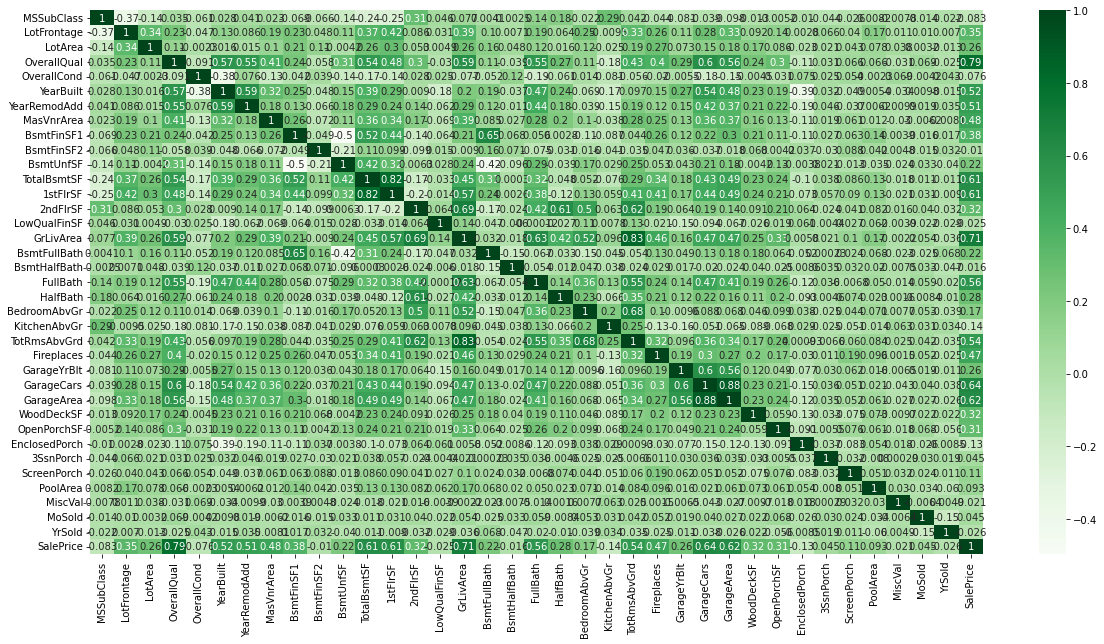

In [21]:
import seaborn as sns
%matplotlib inline
plt.figure(figsize=(20,10))
sns.heatmap(df_corr, annot=True,cmap='Greens')
plt.show()

**Observation:**
Columns that are highly correlataed with SalePrice are as below
- **OverallQual**(0.79)
- YearBuilt(0.52)
- **TotalBsmtSF**(0.61)
- **GrLivArea**(0.71)
- FullBath(0.56)
- **GarageArea**(0.62)

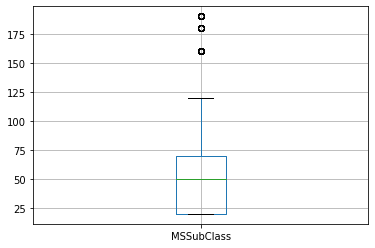

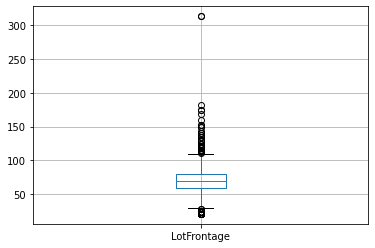

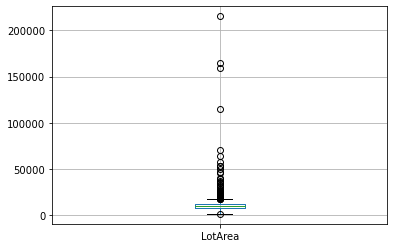

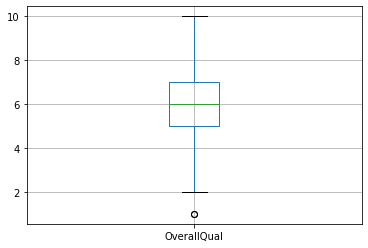

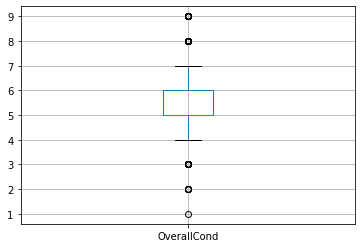

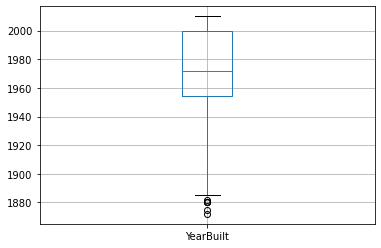

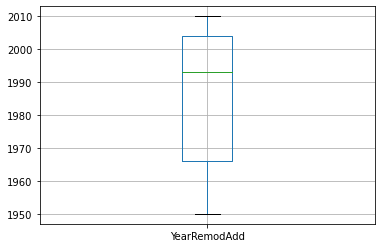

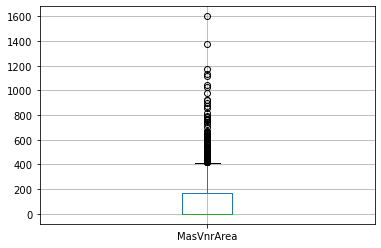

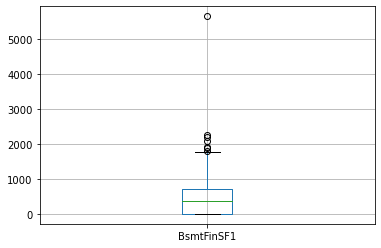

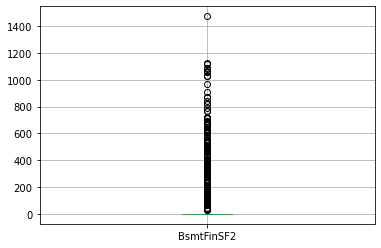

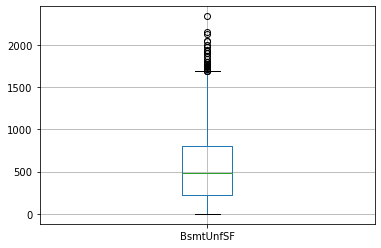

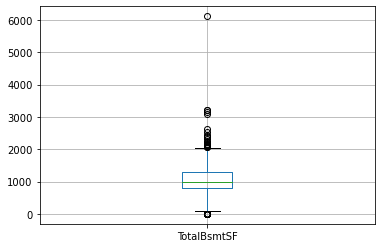

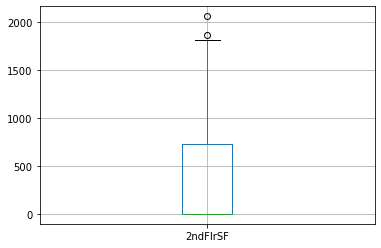

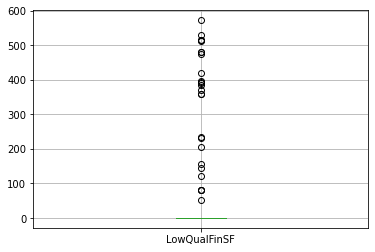

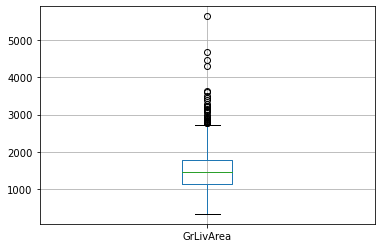

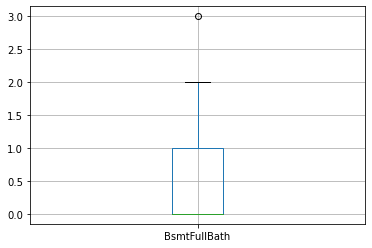

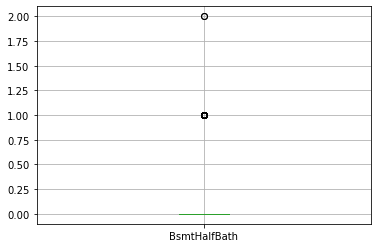

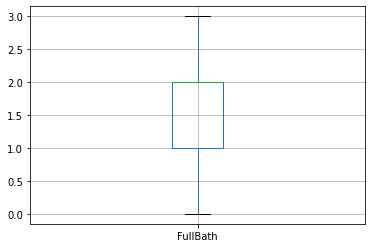

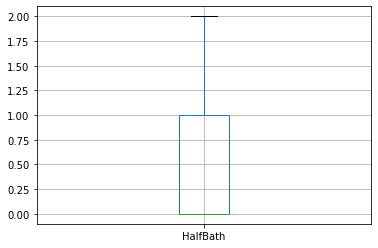

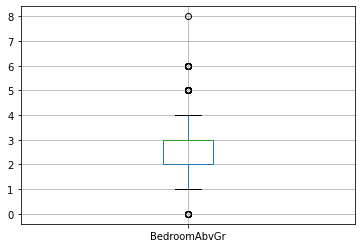

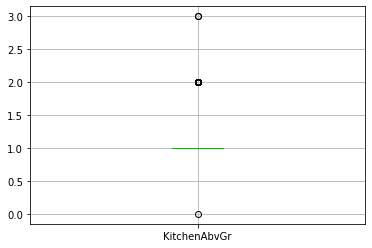

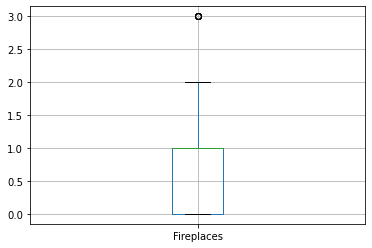

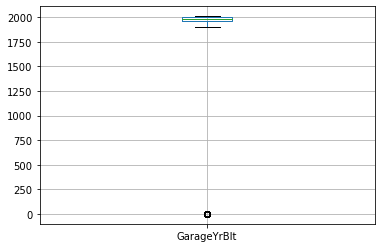

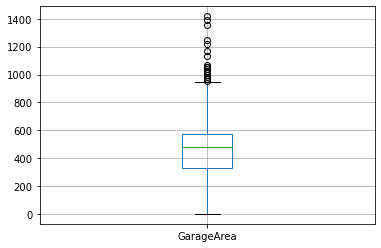

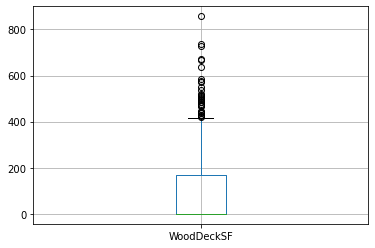

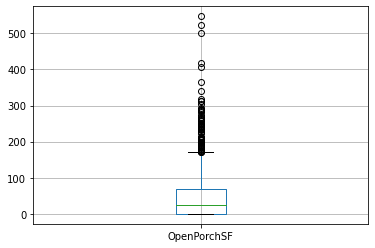

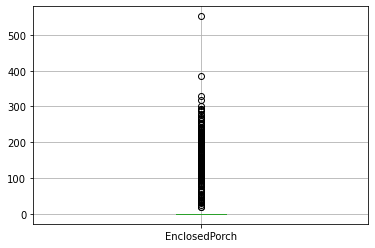

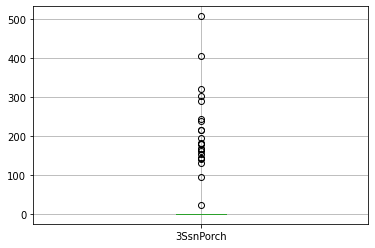

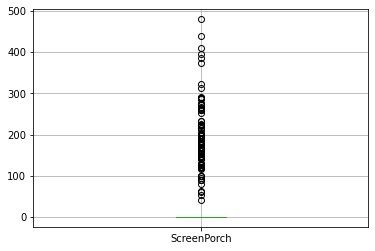

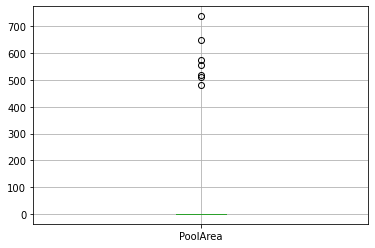

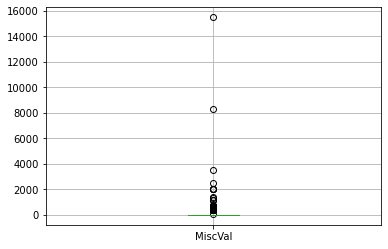

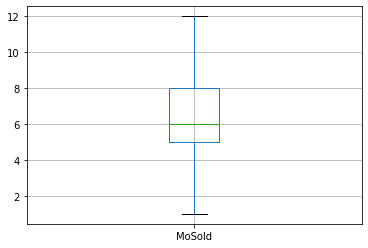

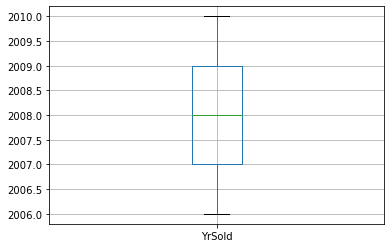

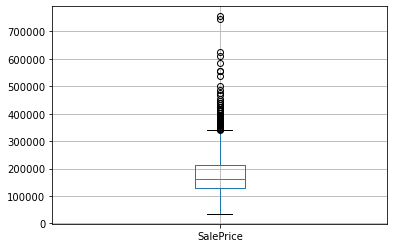

In [22]:
import matplotlib.pyplot as plt

#check for outliers
for column in df:
    if df[column].dtype=='float64' or df[column].dtype=='int64':
        plt.figure()
        df.boxplot([column])

**Observation:**
Need to perform outlier treatment for Squarefeet area columns
- LotFrontage
- LotArea
- MasVnrArea
- BsmtFinSF1
- BsmtFinSF2
- BsmtUnfSF
- TotalBsmtSF
- 2ndFlrSF
- GrLivArea
- GarageArea
- WoodDeckSF
- OpenPorchSF
- EnclosedPorch
- ScreenPorch
- PoolArea

In [23]:
#Remove outliers that are not in 1.5 times IQR of 5% to 95%
print(df.shape)
cols = ['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '2ndFlrSF', 'GrLivArea', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 'ScreenPorch', 'PoolArea']
Q1 = df[cols].quantile(0.05)
Q3 = df[cols].quantile(0.95)
IQR = Q3 - Q1
df = df[~((df[cols] < (Q1 - 1.5 * IQR)) |(df[cols] > (Q3 + 1.5 * IQR))).any(axis=1)]
print(df.shape)

(1451, 77)
(1413, 77)


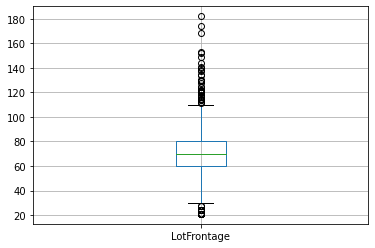

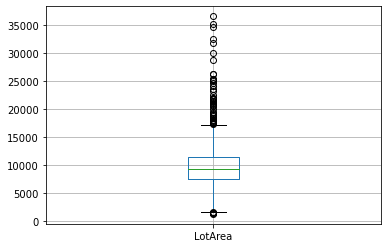

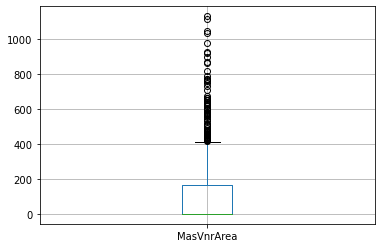

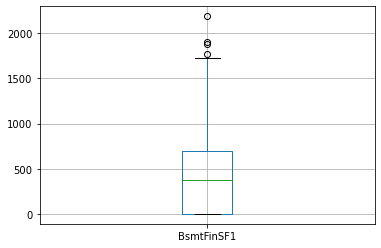

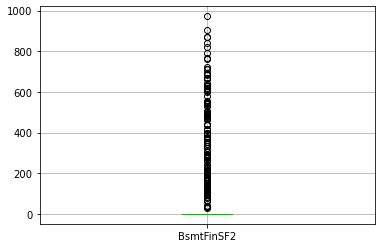

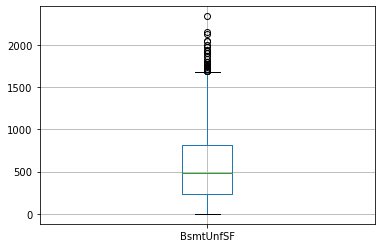

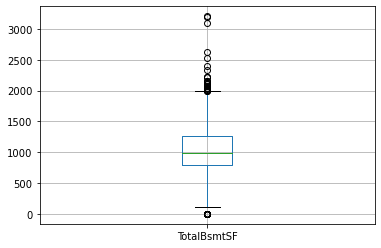

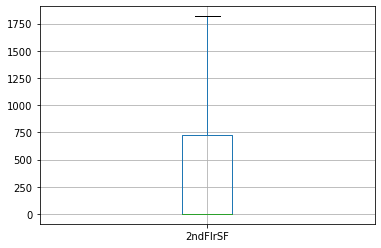

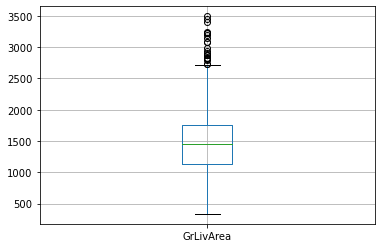

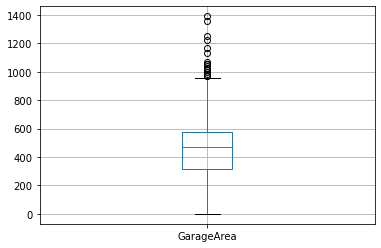

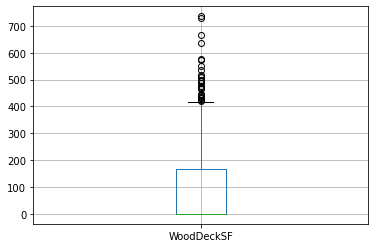

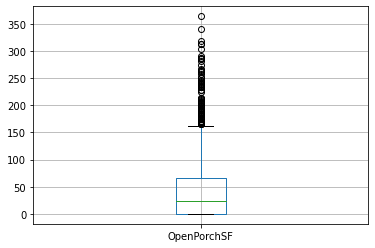

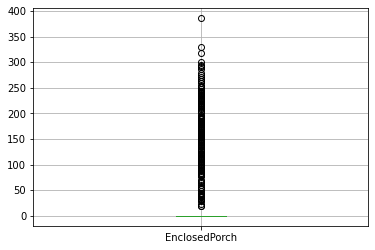

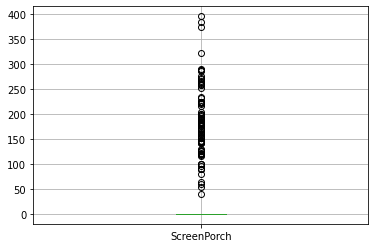

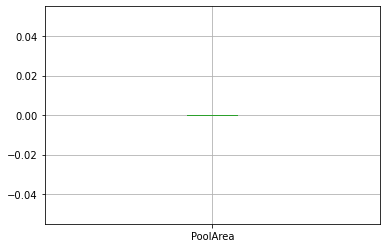

In [24]:
#check boxplot post outlier treatment
for column in df:
    if column in cols:
        plt.figure()
        df.boxplot([column])

**Comments:**
As per domain knowledge usually, enclosed patios don’t count as home square footage, but it’s not impossible. It generally depends on the quality of your enclosed space. For example, if your enclosed patio has components such as access to heat and A/C, it could be counted as home square footage. Hence changing few unreliable info to binary.

- **EnclosedPorch** - Change values to 0 or 1
- **ScreenPorch** - Change values to 0 or 1
- **WoodDeckSF** - Change values to 0 or 1
- **OpenPorchSF** - Change values to 0 or 1
- **PoolArea** - Change values to 0 or 1
- **3SsnPorch** - Change values to 0 or 1


In [25]:
#function to change values to 0 or 1
def changeToZeroOrOne(df,col):
    df[col]=df[col].apply(lambda x:x if x==0 else 1)
    return df

In [26]:
#changing few colums values to 0 or 1 based on the previous observation
cols = ['WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 'ScreenPorch', 'PoolArea', '3SsnPorch']
for column in df:
    if column in cols:
        df = changeToZeroOrOne(df,column)

In [27]:
#check the cols after changing values to 0 or 1
for column in df:
    if column in cols:
        print(column)
        print(df[column].value_counts())

WoodDeckSF
0    742
1    671
Name: WoodDeckSF, dtype: int64
OpenPorchSF
1    769
0    644
Name: OpenPorchSF, dtype: int64
EnclosedPorch
0    1210
1     203
Name: EnclosedPorch, dtype: int64
3SsnPorch
0    1389
1      24
Name: 3SsnPorch, dtype: int64
ScreenPorch
0    1306
1     107
Name: ScreenPorch, dtype: int64
PoolArea
0    1413
Name: PoolArea, dtype: int64


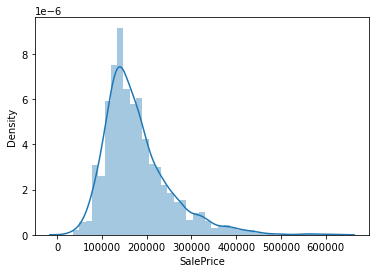

In [28]:
#visualise the dependent variable
plt.figure()
sns.distplot(df['SalePrice'])
plt.show()

<AxesSubplot:>

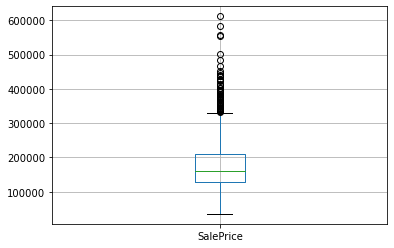

In [29]:
#check outliers in target variable
df.boxplot(['SalePrice'])

**Observation:**
- Can decide to remove outliers beyond 500000 since beyond that price it is skewed to the right.
- Target variable can be log transformed to check if it makes it uniformly distributed than right skewed.

In [30]:
#remove outlier values beyond 500k as observed in box plot
df = df[df['SalePrice']<500000]

# Data Handling

In [31]:
#apply log transformation to target variable
df['SalePrice'] = np.log1p(df['SalePrice'])

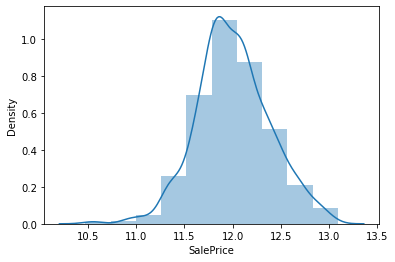

In [32]:
plt.figure()
sns.distplot(df['SalePrice'], bins=10)
plt.show()

In [33]:
#creating no. of years between sold and built, remod and garage built.
df['YearBuilt_sold'] = df.YrSold-df.YearBuilt
df['YearRemodAdd_sold'] = df.YrSold-df.YearRemodAdd
df['GarageYrBlt_sold'] = df.YrSold-df.GarageYrBlt

In [34]:
import calendar
#change month of house sold from number to month in text short form
df['MoSold'] = df['MoSold'].apply(lambda x:calendar.month_abbr[x])

# Data Analysis

### Univariate Analysis

In [35]:
#import necessary libs
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import plotly.offline as py 
py.init_notebook_mode(connected=True) # this code, allow us to work with offline plotly version
import plotly.graph_objs as go # it's like "plt" of matplot
import plotly.tools as tls # It's useful to we get some tools of plotly
import warnings # This library will be used to ignore some warnings
from collections import Counter # To do counter of some features

In [36]:
plt.style.use('ggplot')

In [37]:
#function to check spread of variable
def checkCatVarSpread(df,col):
    plt.figure(figsize = (12, 6))
    plt.title("Spread of "+col)
    sns.countplot(x=df[col])
    plt.show()
    
    #labels
    lab = df[col].value_counts().keys().tolist()
    #values
    val = df[col].value_counts().values.tolist()

    trace = go.Pie(labels = lab ,
                   values = val ,
                   marker = dict(colors =  [ 'red' ,'lime','royalblue'],
                                 line = dict(color = "white",
                                             width =  1)
                                ),
                   rotation = 90,
                   hoverinfo = "label+value+text",
                   hole = .5
                  )
    layout = go.Layout(dict(title = col,
                            plot_bgcolor  = "rgb(243,243,243)",
                            paper_bgcolor = "rgb(243,243,243)",
                           )
                      )

    data = [trace]
    fig = go.Figure(data = data,layout = layout)
    py.iplot(fig)

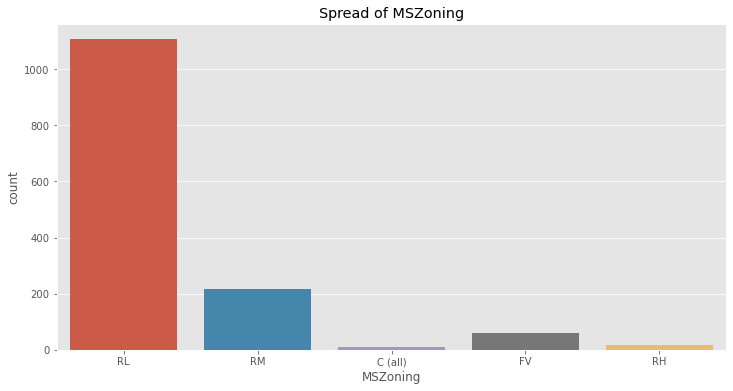

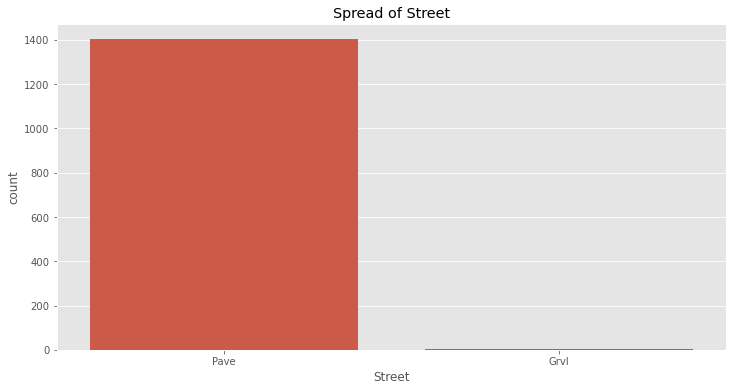

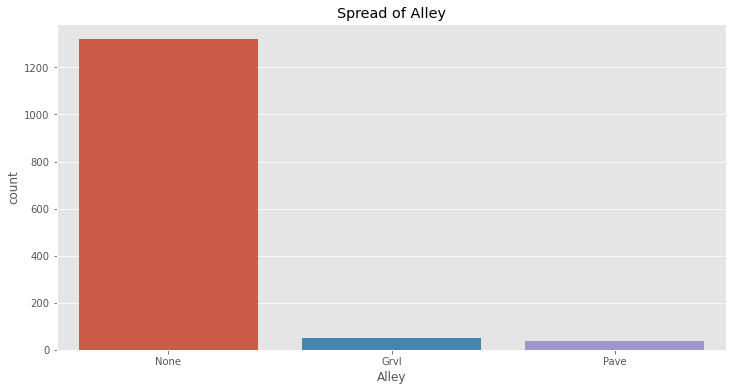

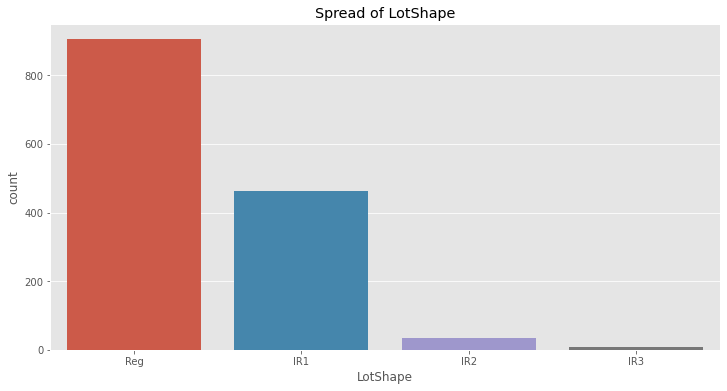

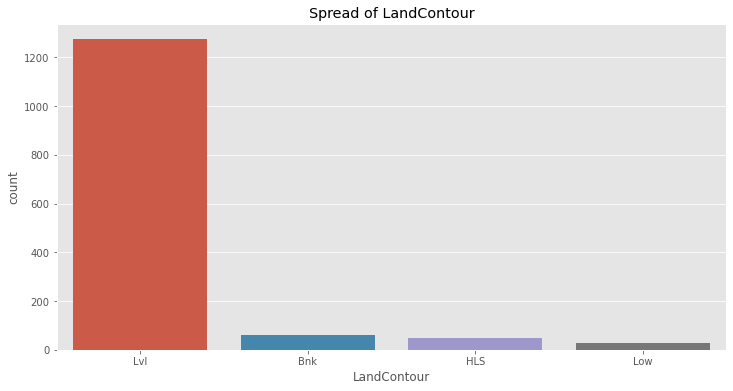

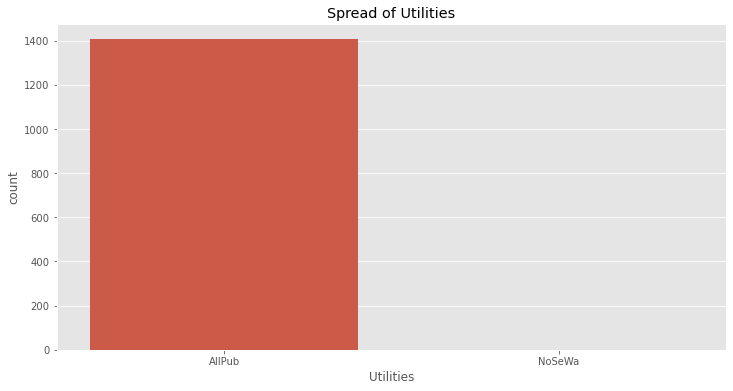

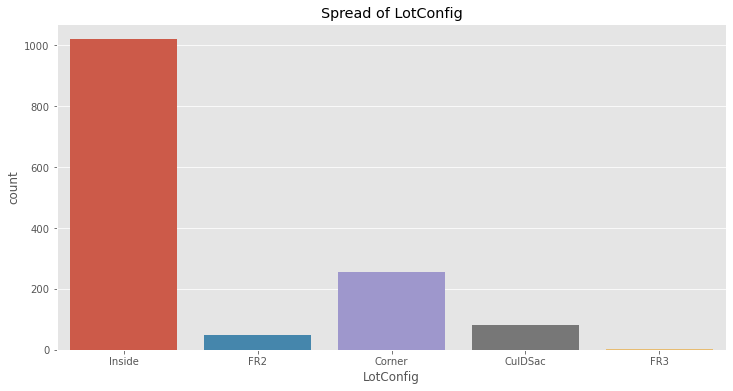

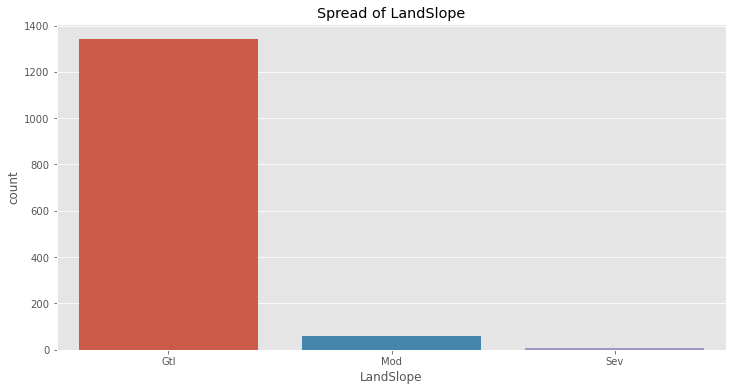

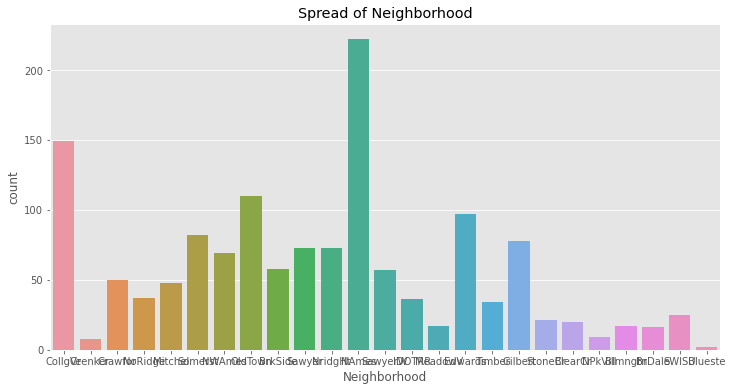

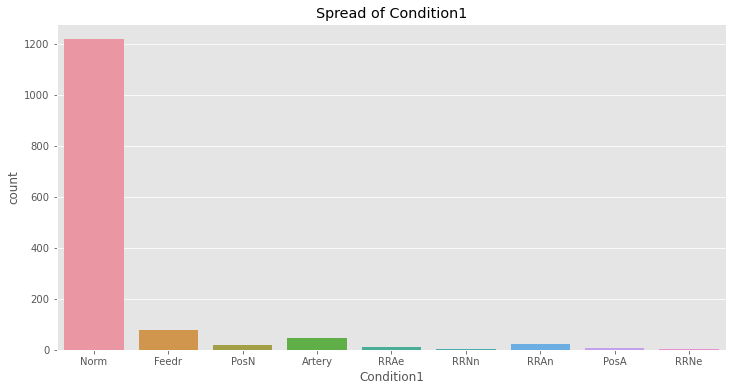

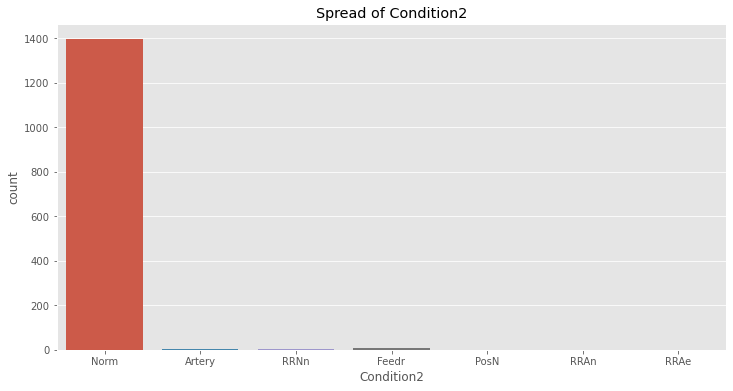

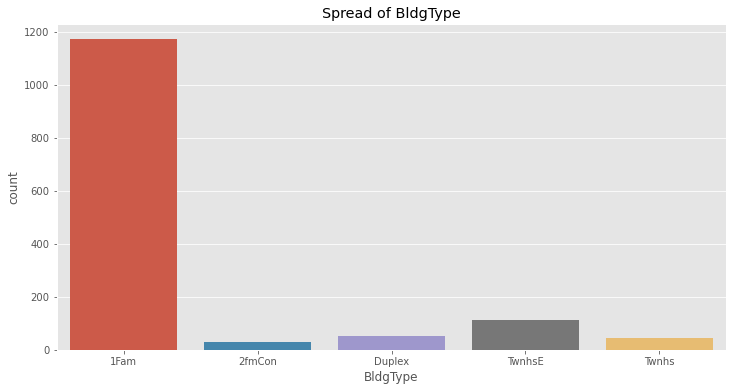

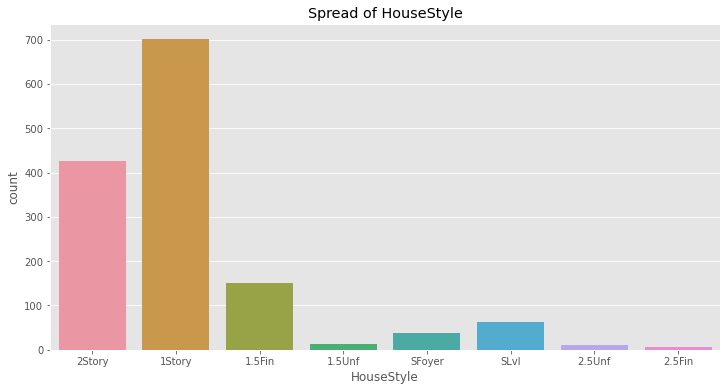

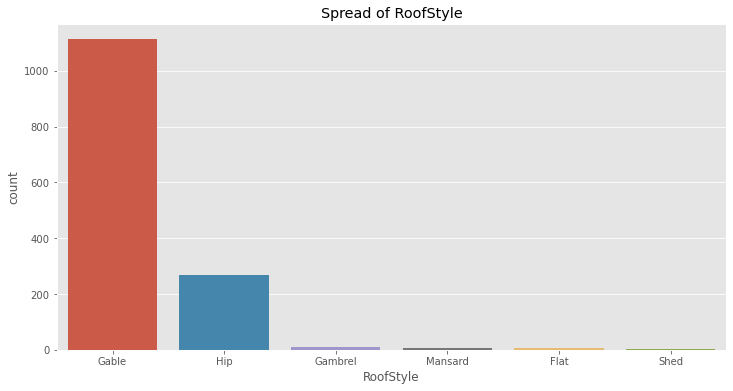

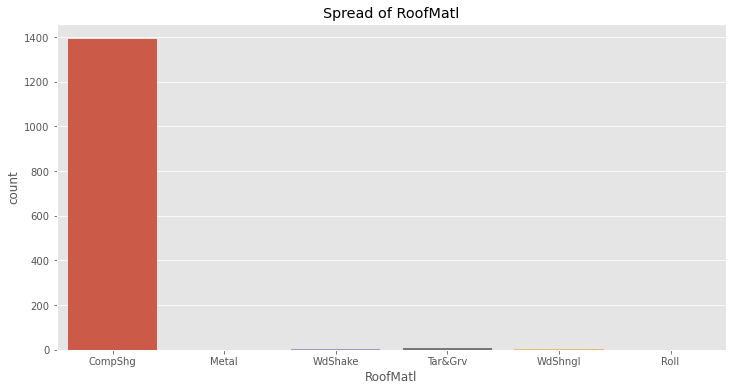

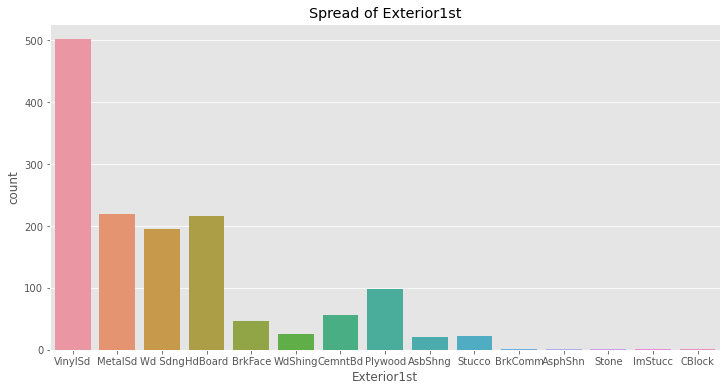

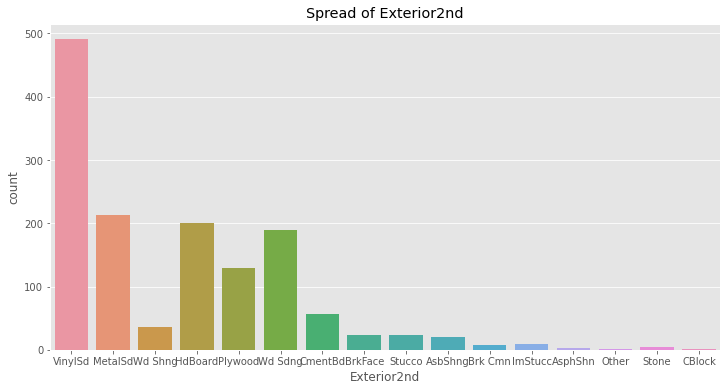

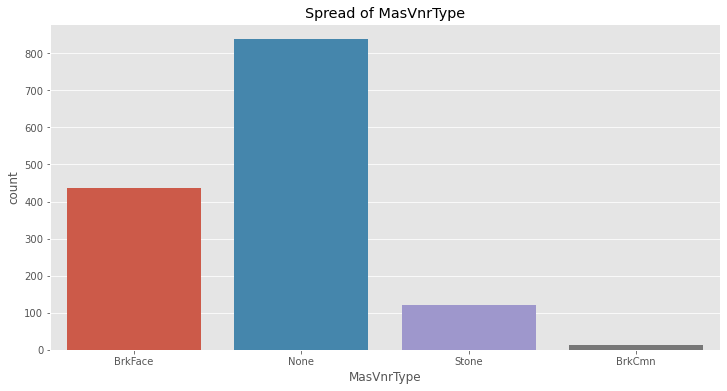

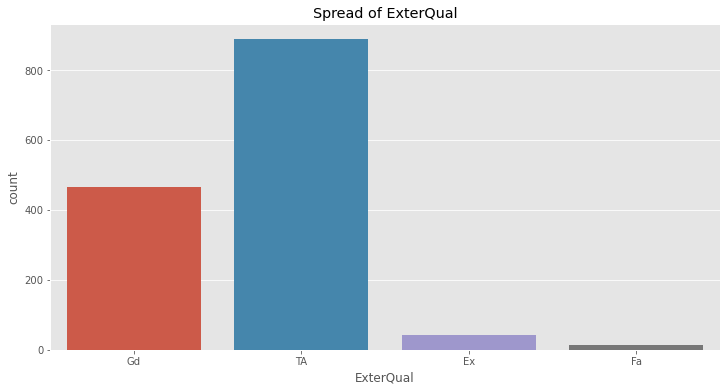

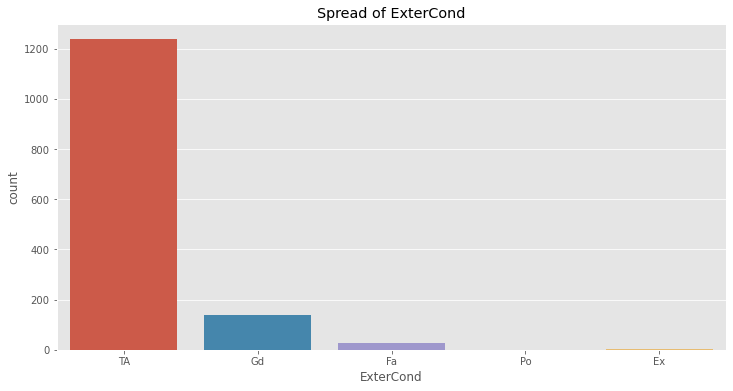

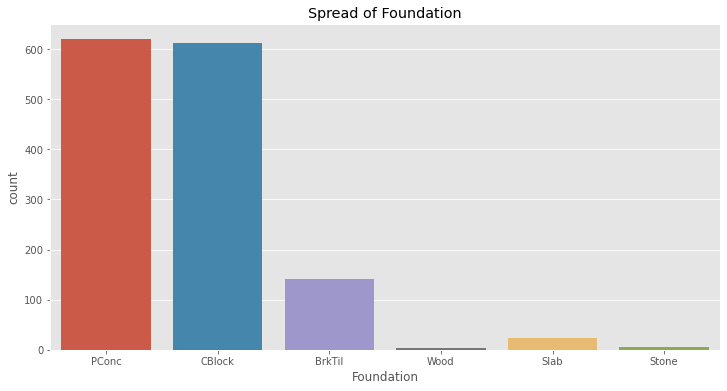

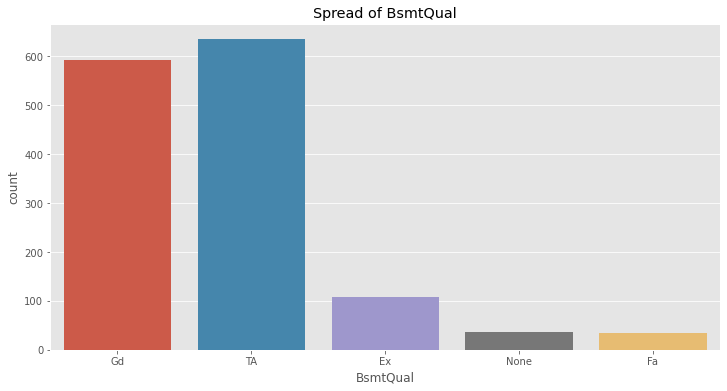

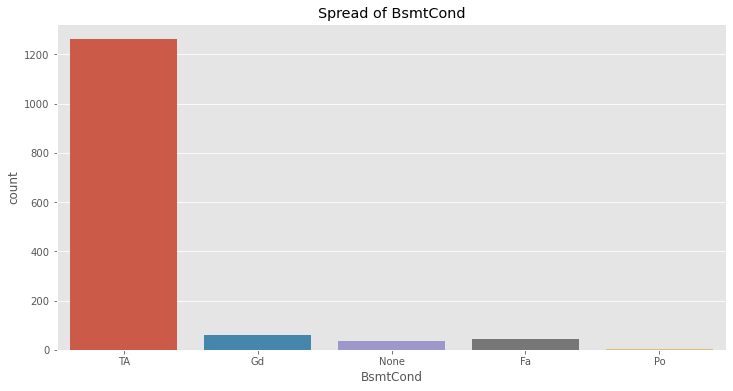

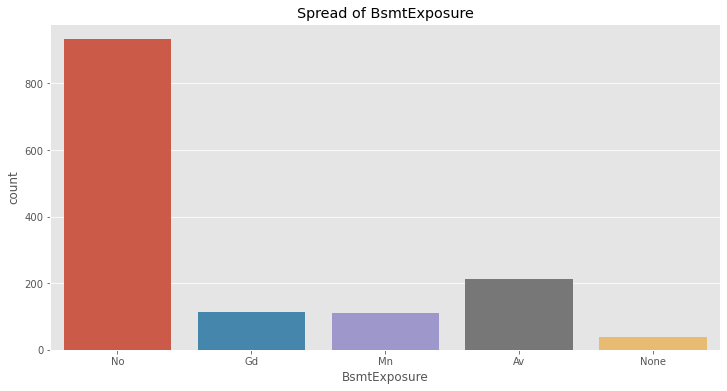

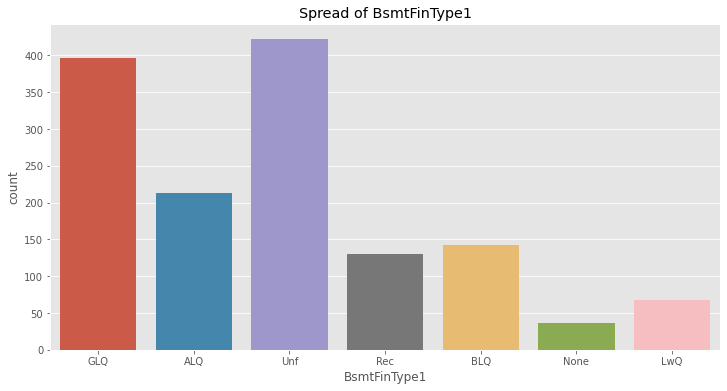

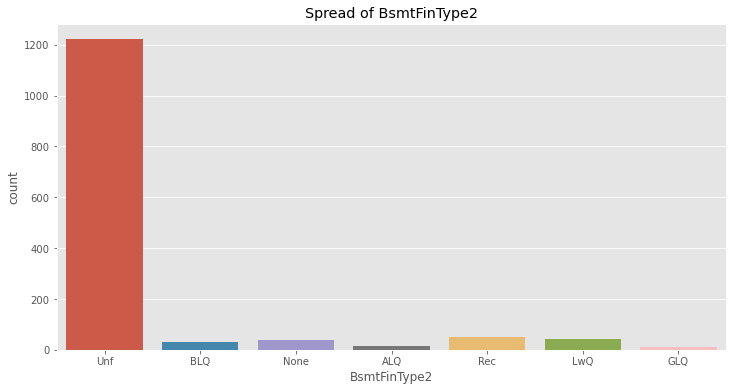

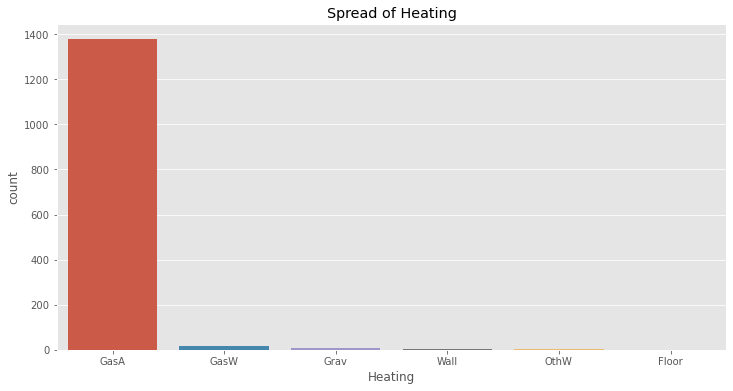

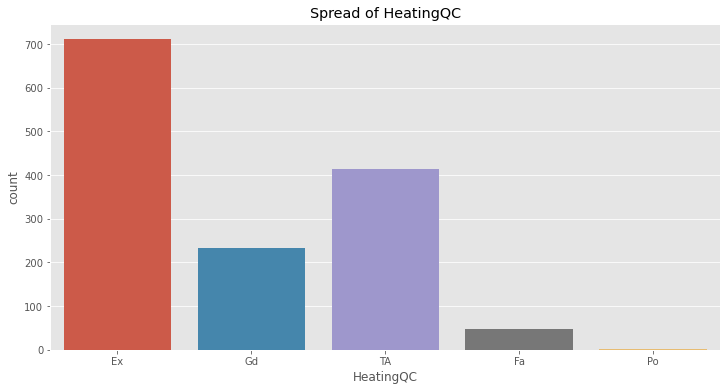

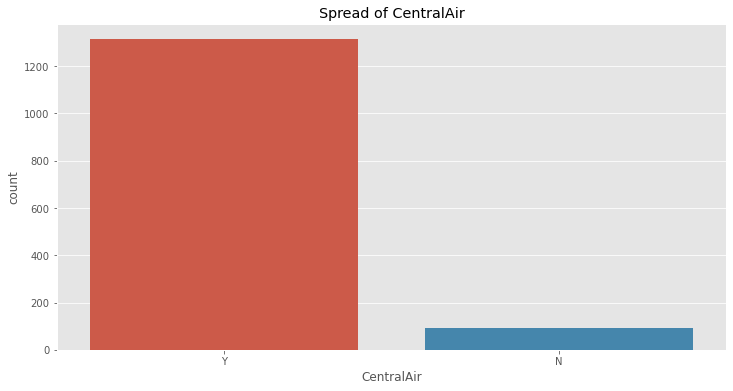

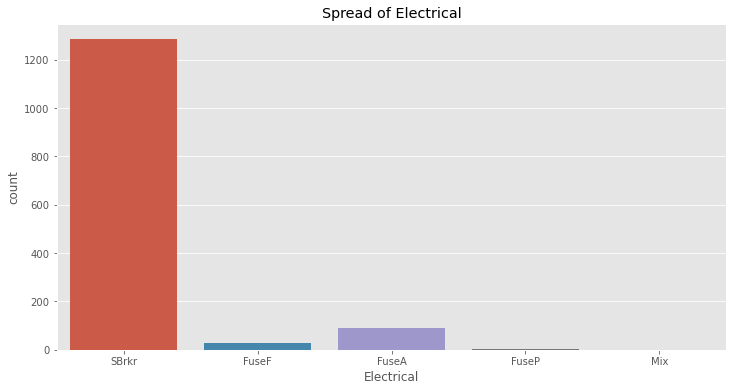

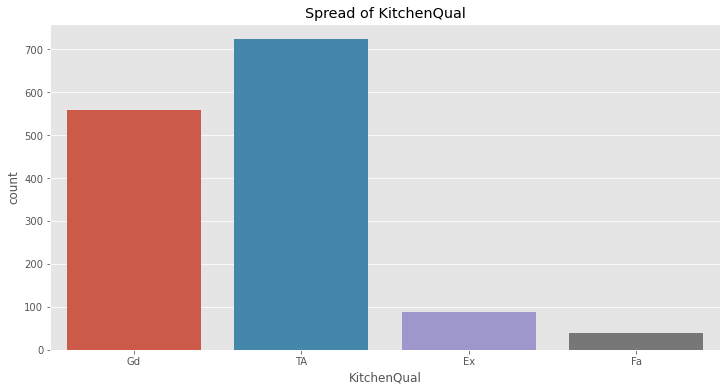

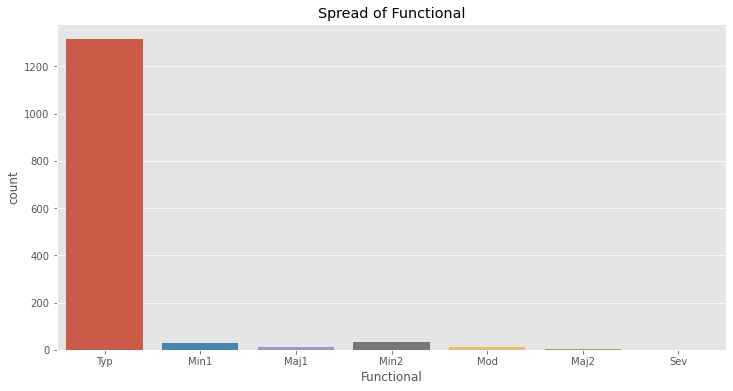

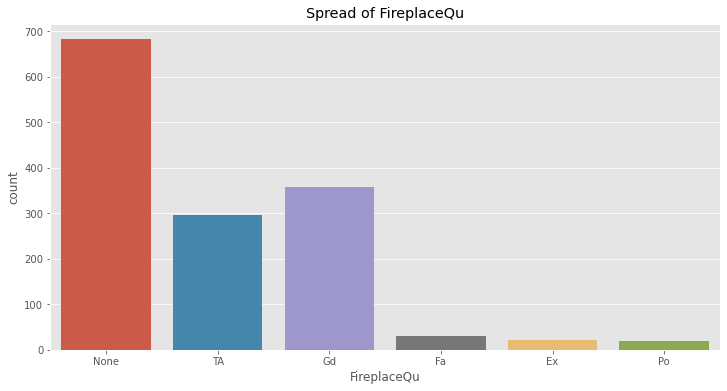

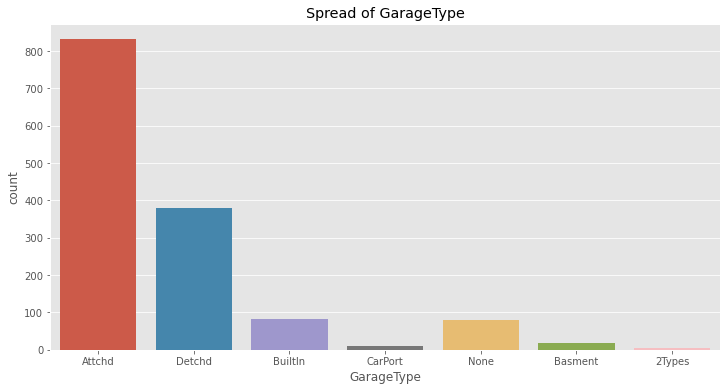

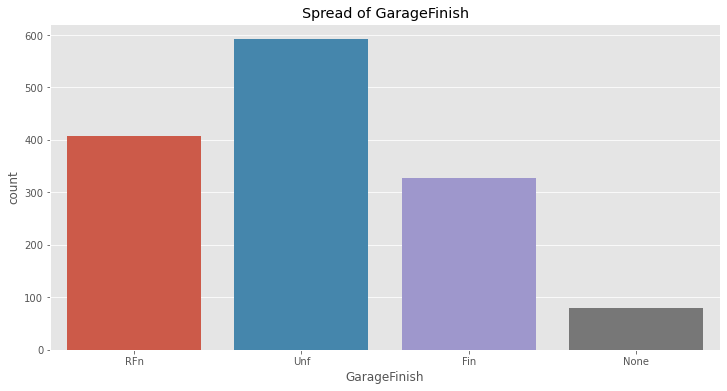

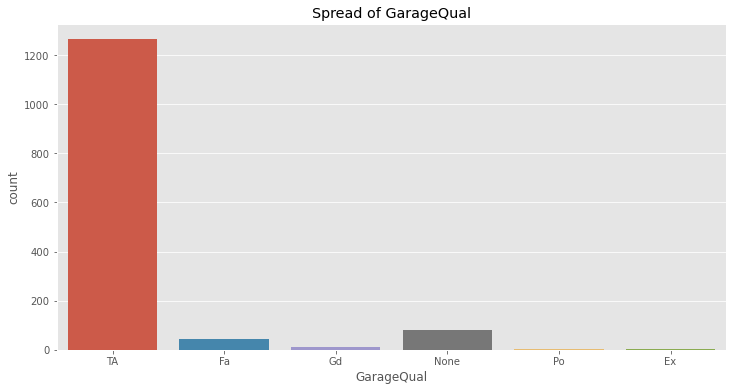

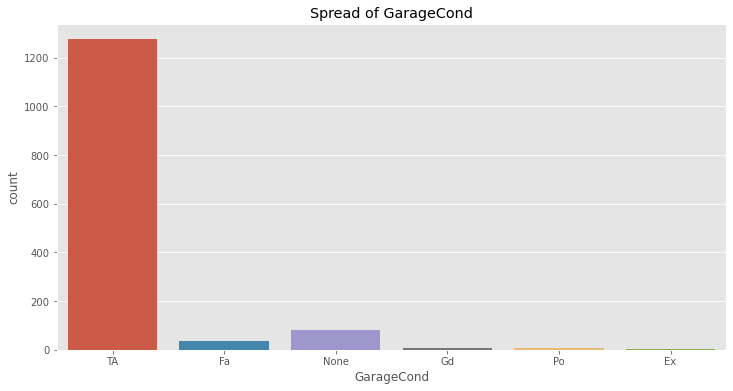

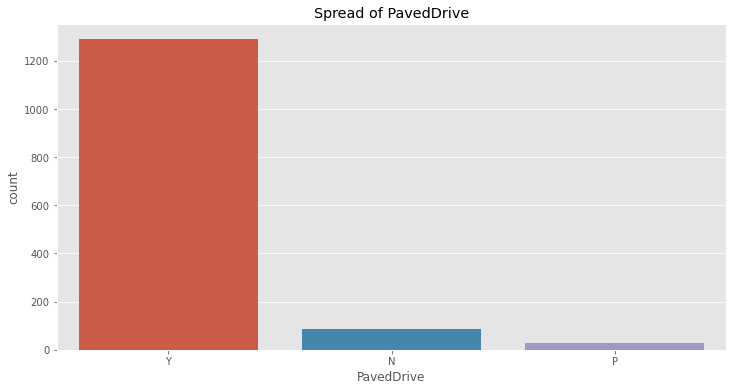

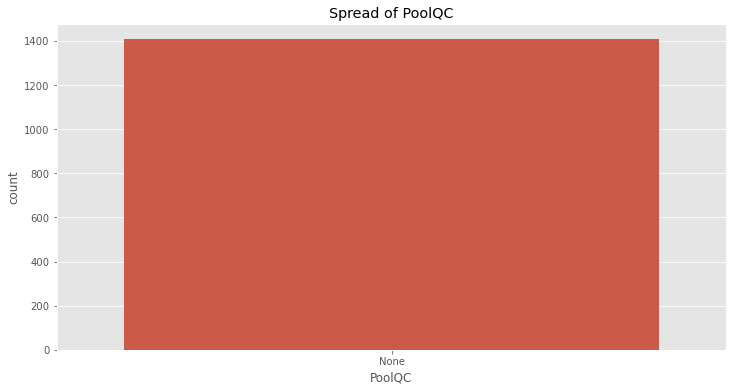

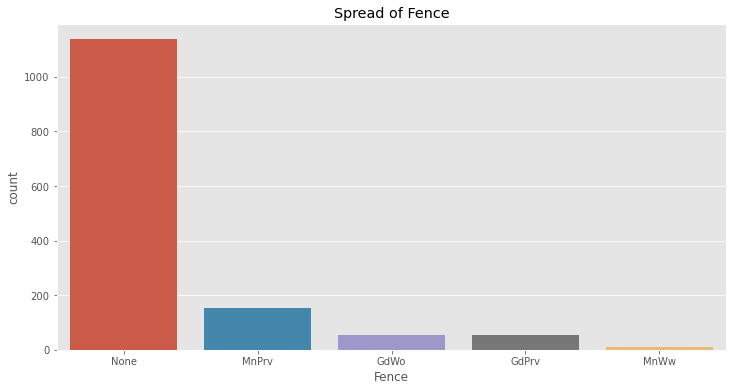

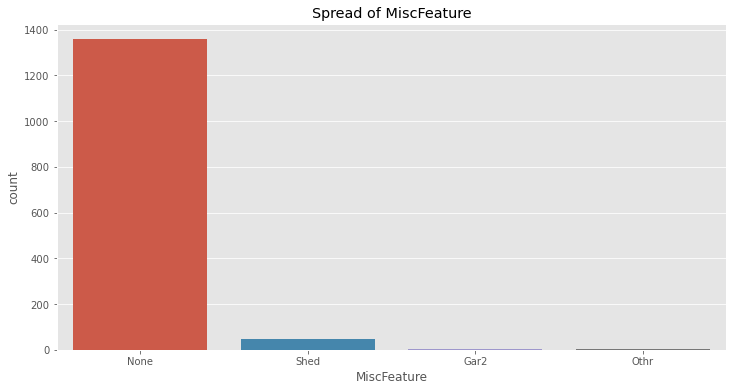

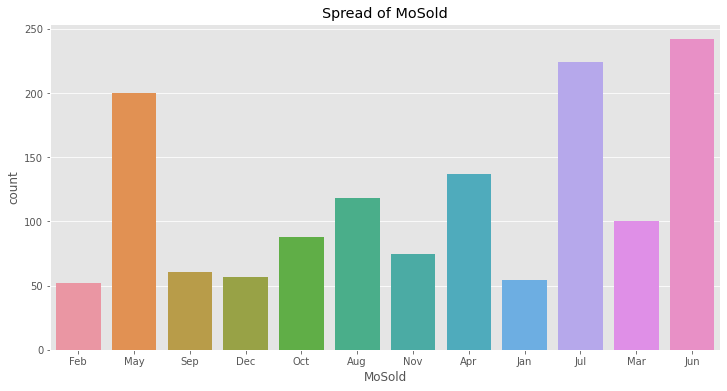

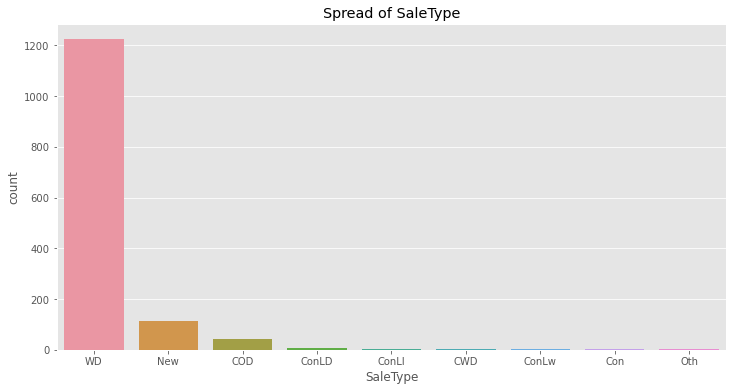

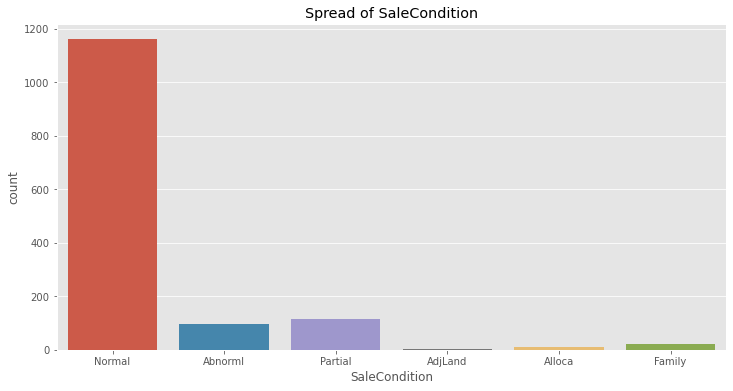

In [38]:
for column in df:
    if df[column].dtype=='object':
        checkCatVarSpread(df,column)

**Observation:**
- RL is the most present MSZoning
- Pave is street type for 99.6%
- Most of the cases there is no alley
- Most of the LanContour shapes are flat
- 99.9% of houses listed has all public facilities
- 95% of houses has Gentle slope
- Northwest Ames has the most listed homes
- Most houses are in Normal condition
- 98% house GasA tyoe heating
- 93% of houses has centralized air
- 91% of houses has Standard circuit breaker
- 90% of garages are average quality and condition
- 91% of houses has paved drive
- May, Jun and Jul month has almost 50% houses sold
- 88% of the sales are Conventional

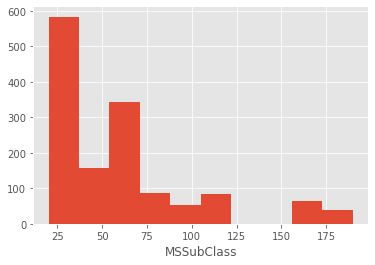

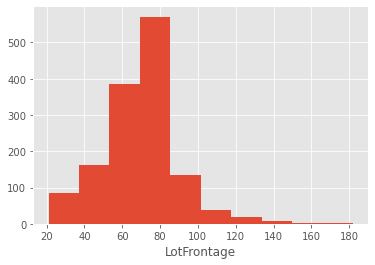

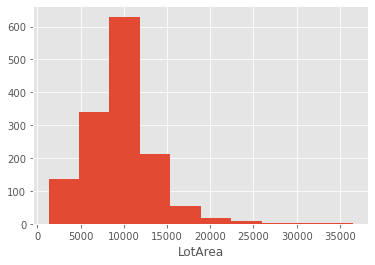

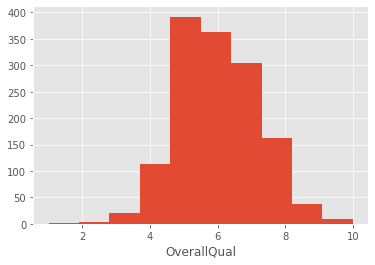

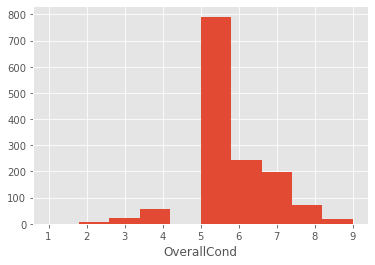

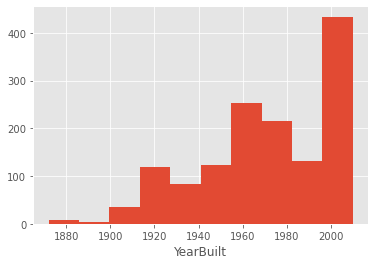

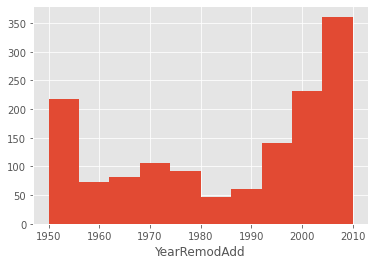

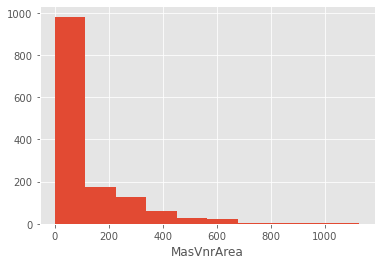

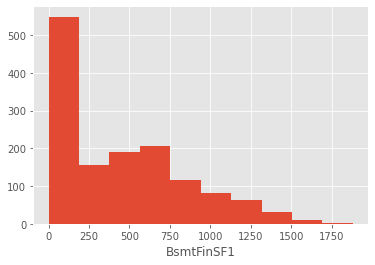

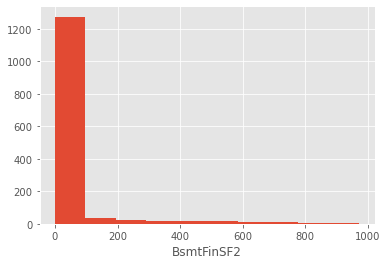

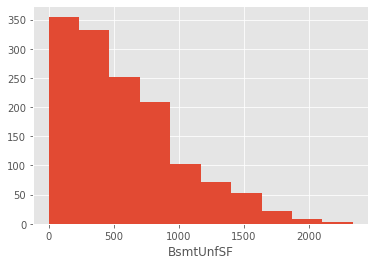

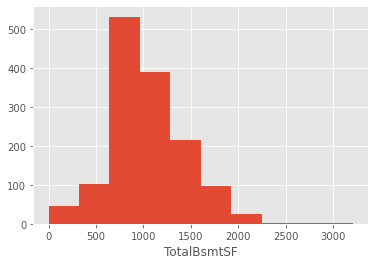

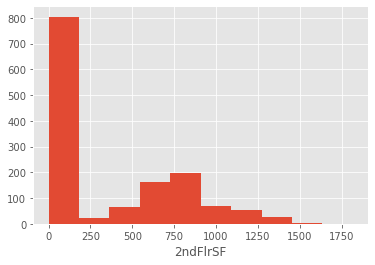

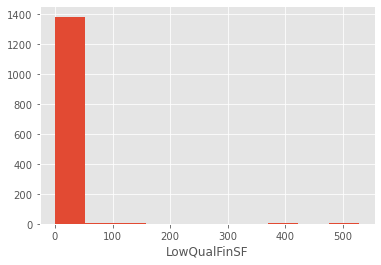

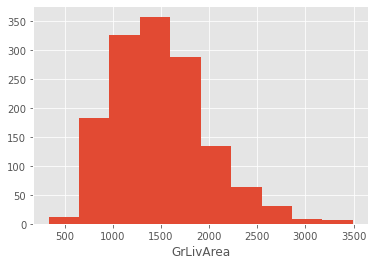

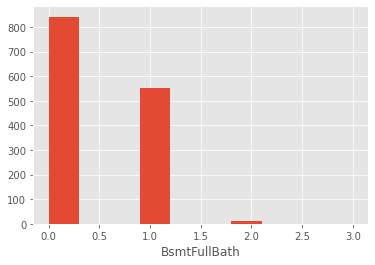

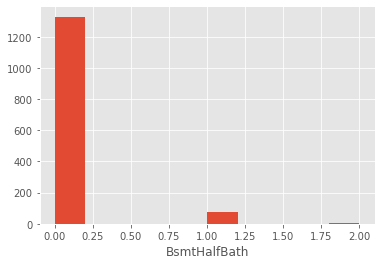

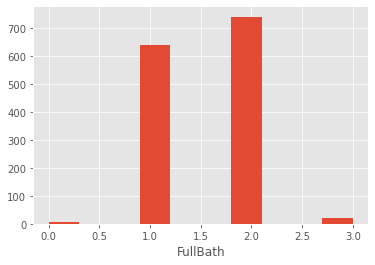

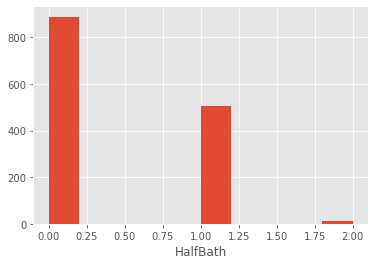

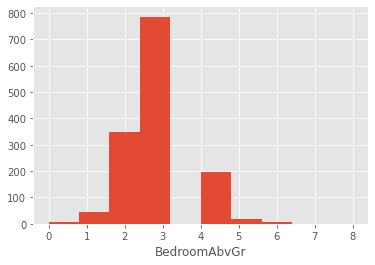

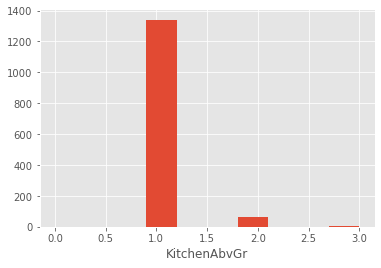

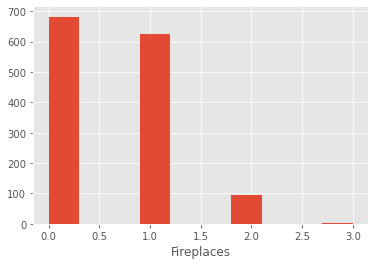

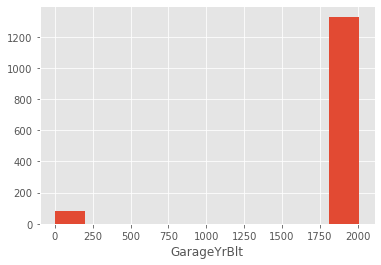

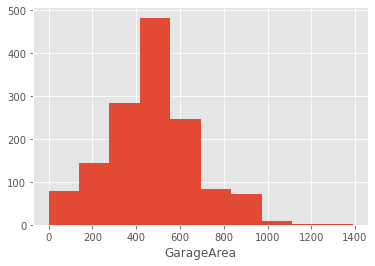

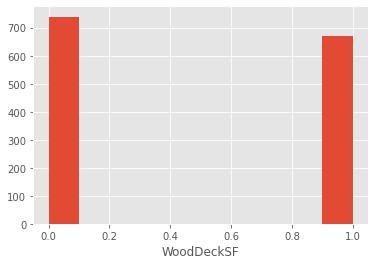

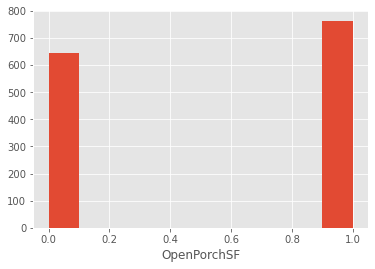

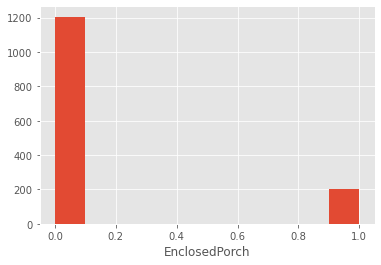

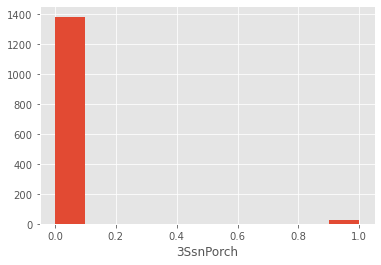

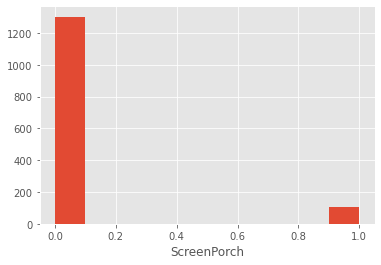

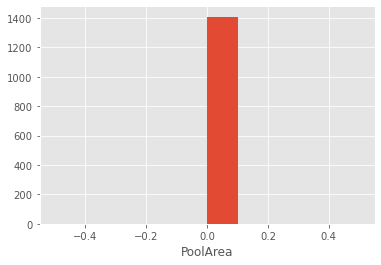

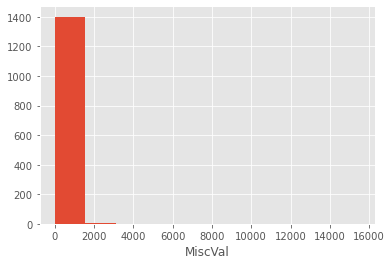

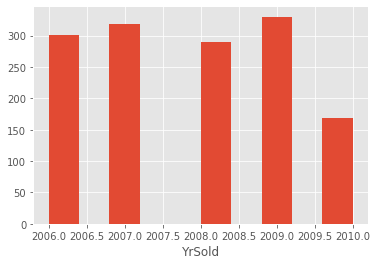

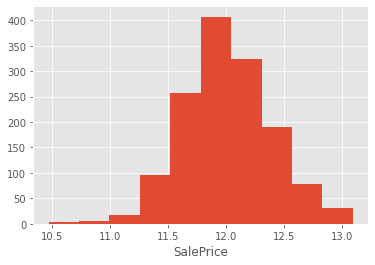

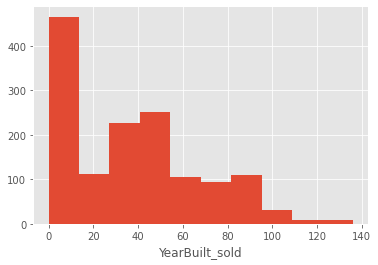

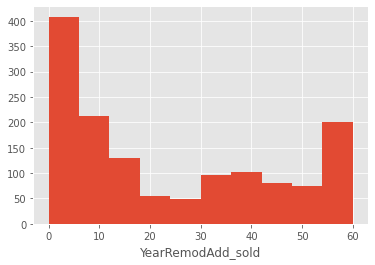

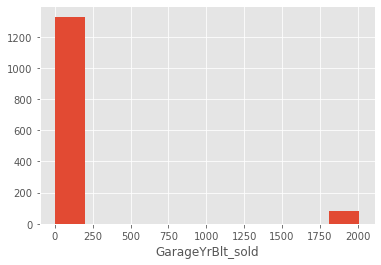

In [39]:
#visualize the numerical variables in histogram
for column in df:
    if df[column].dtype!='object':
        df[column].hist()
        plt.xlabel(column)
        plt.show()

**Observation:**
- OverallQual and OverallCond 5 is the most prevalent quality of houses
- Most of sold houses are built in year 2000
- Typical houses has 900 to 1000 TotalBsmtSF
- Typical houses has 1500 GrLivArea
- Typical GarageArea is around 500 SF

### Bivariate Analysis

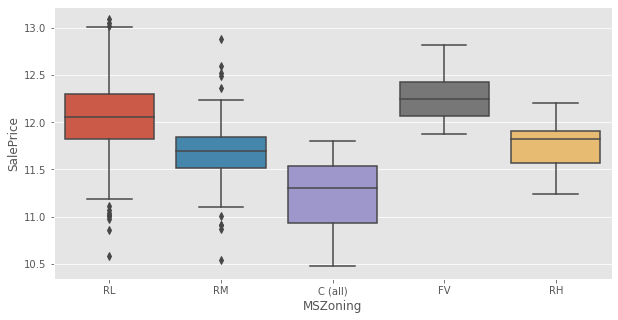

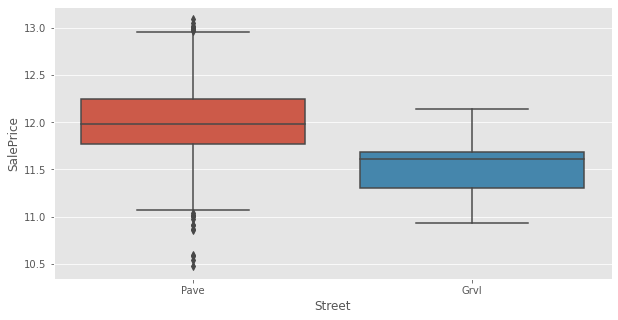

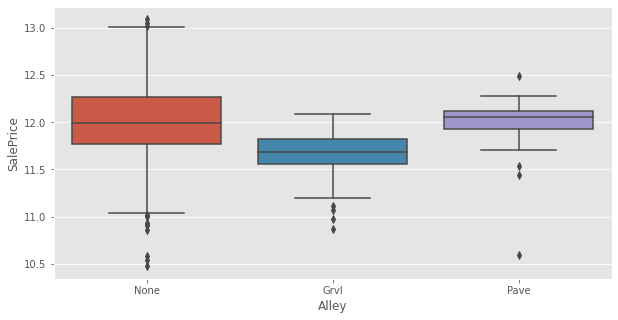

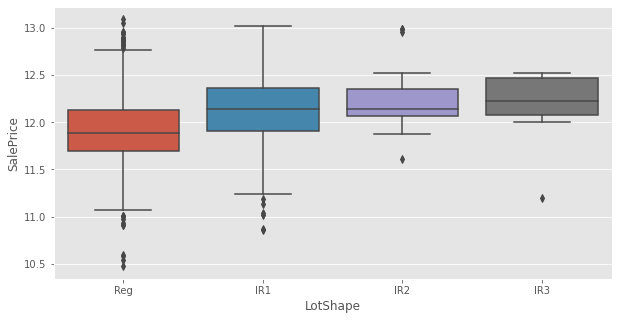

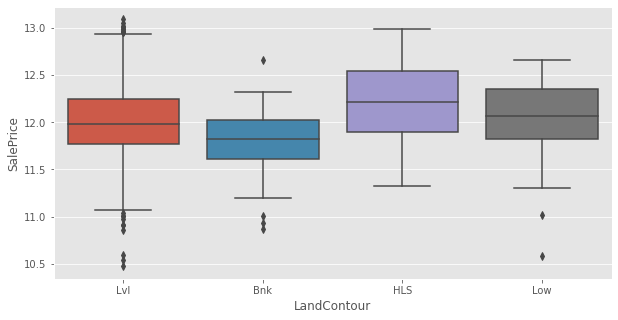

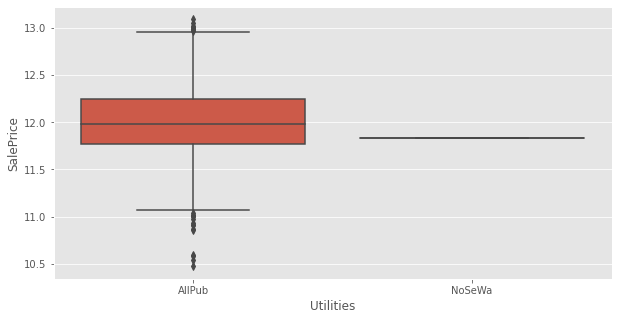

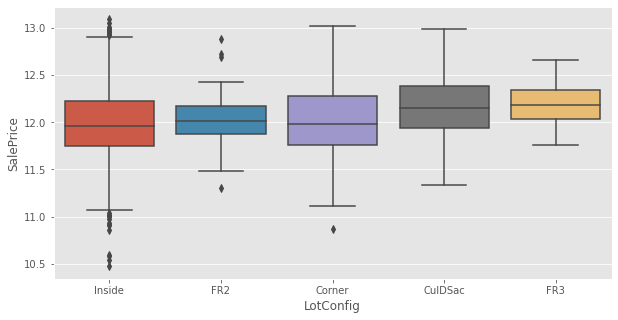

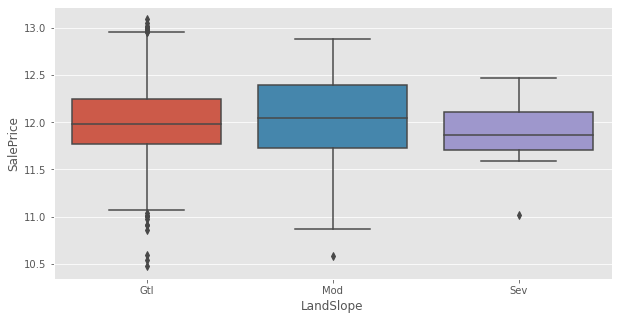

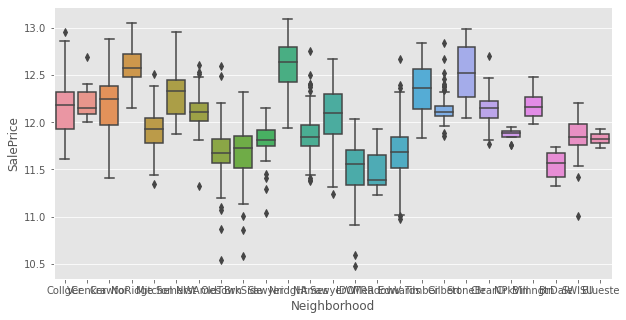

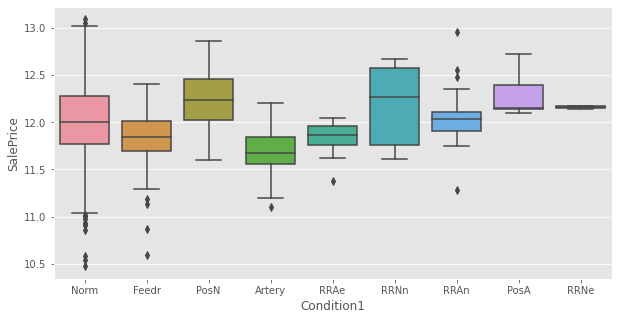

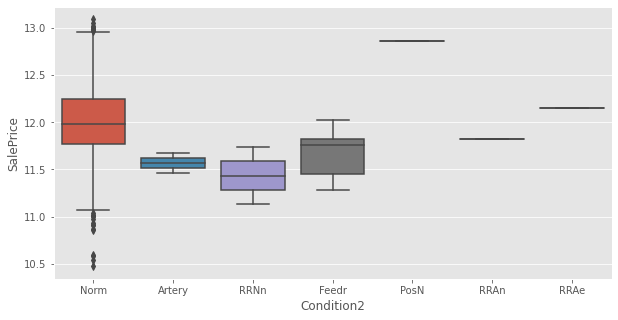

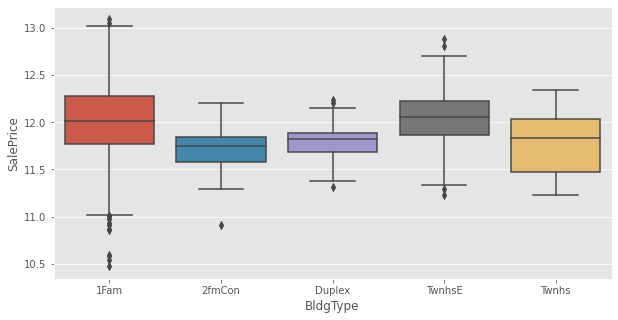

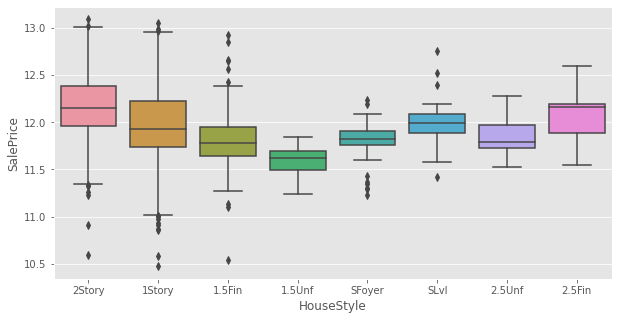

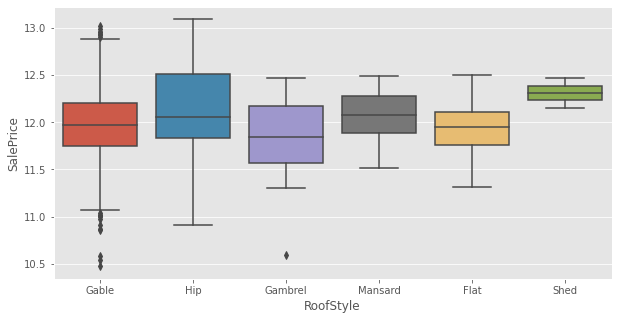

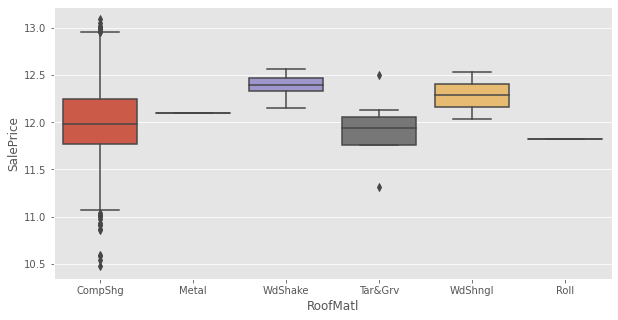

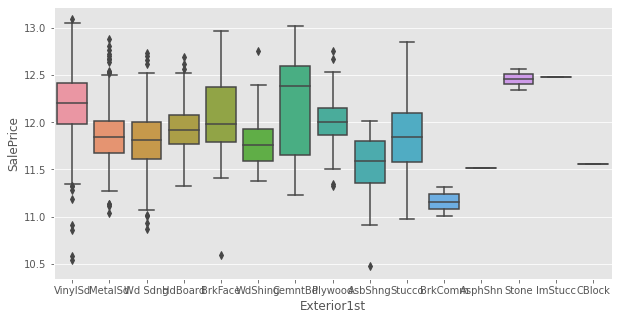

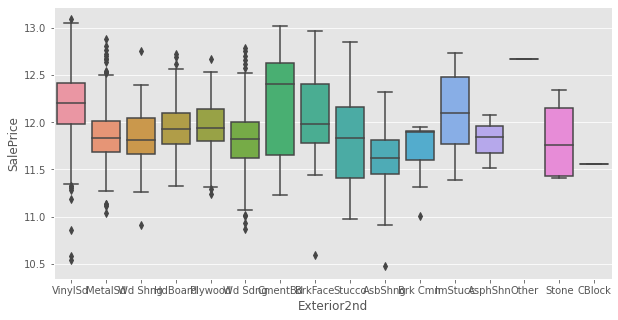

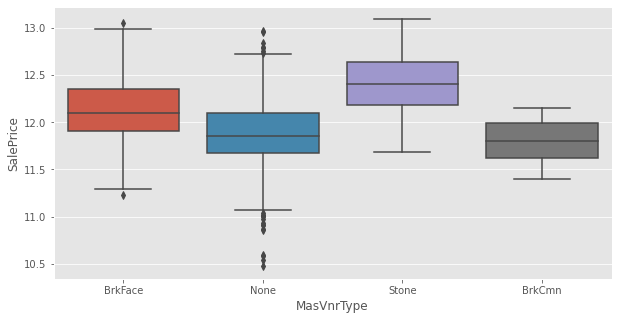

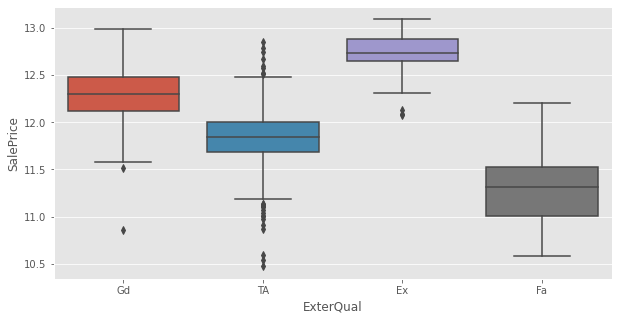

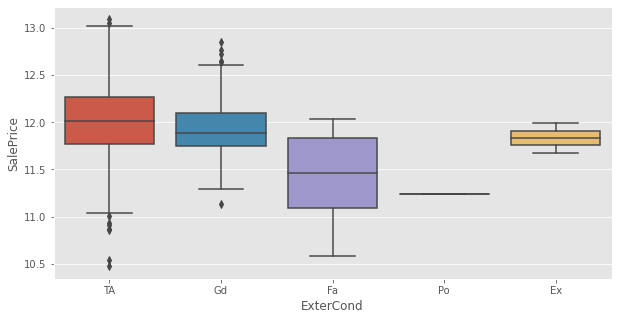

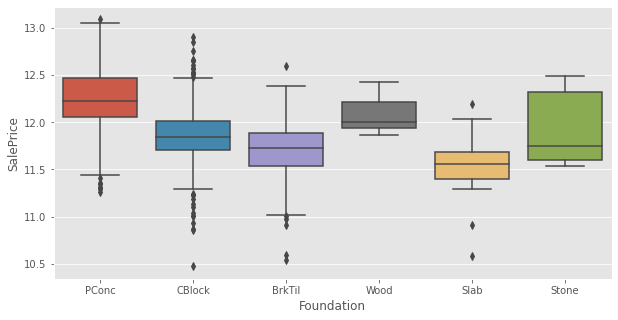

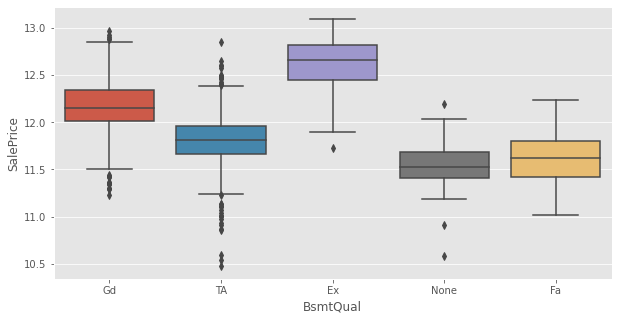

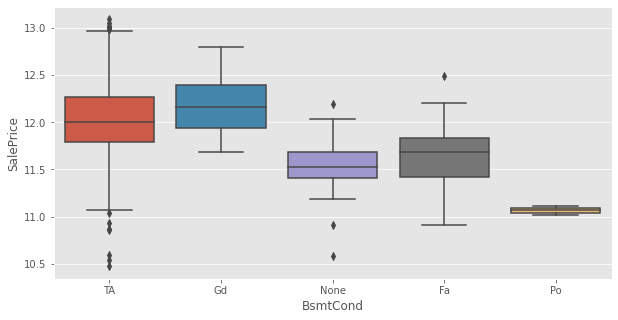

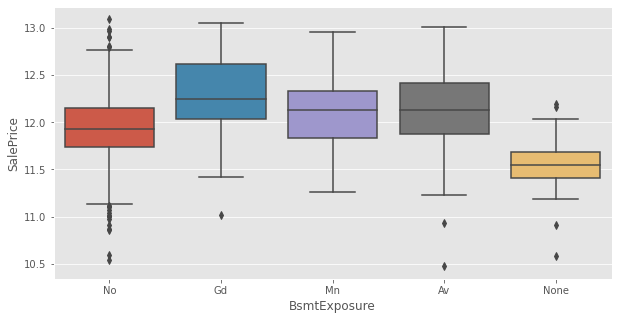

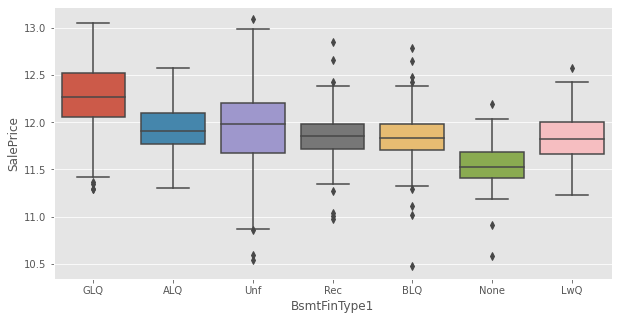

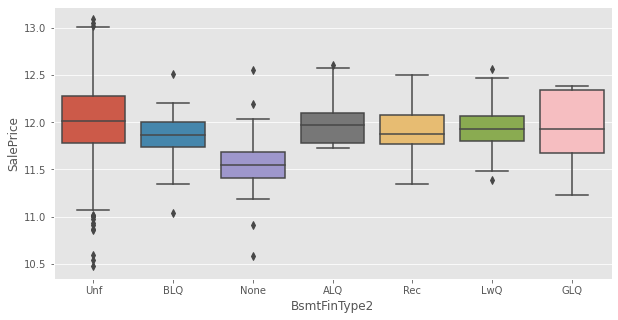

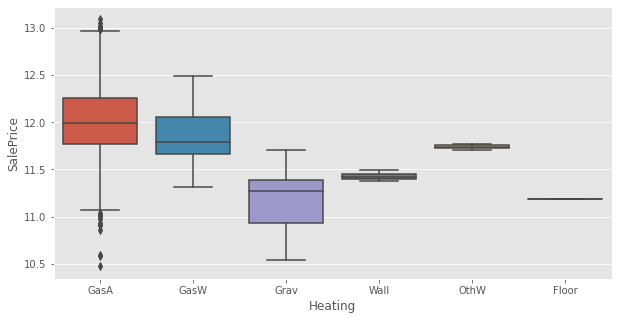

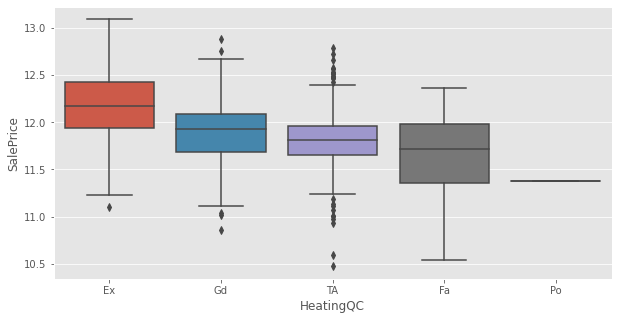

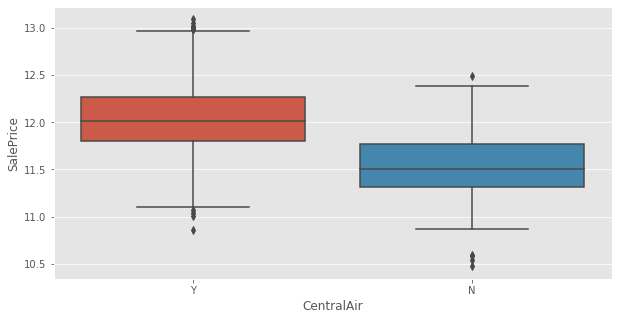

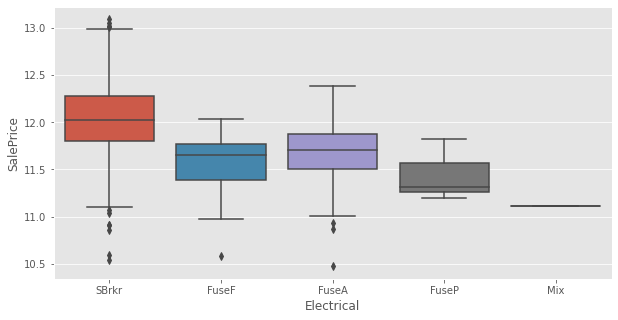

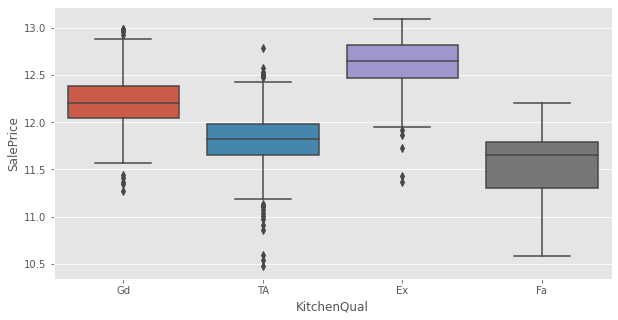

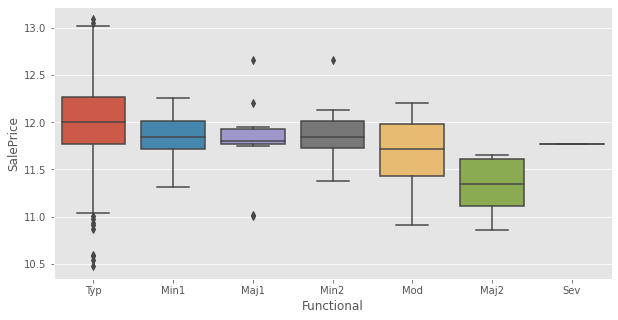

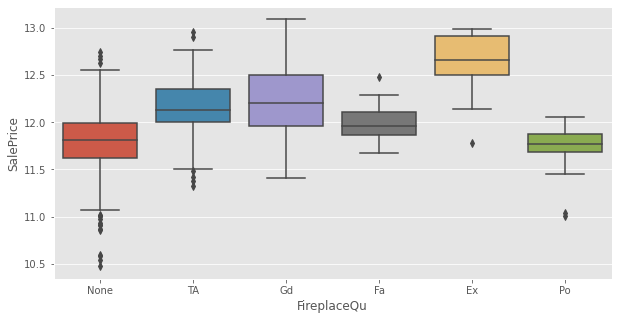

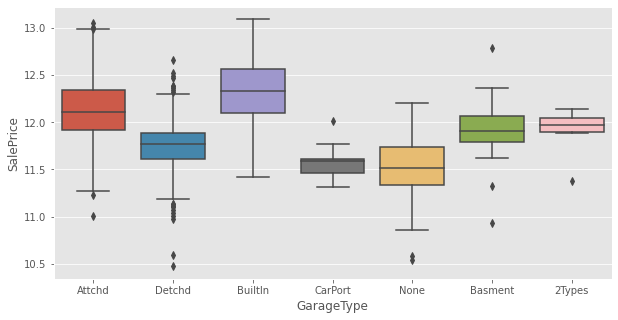

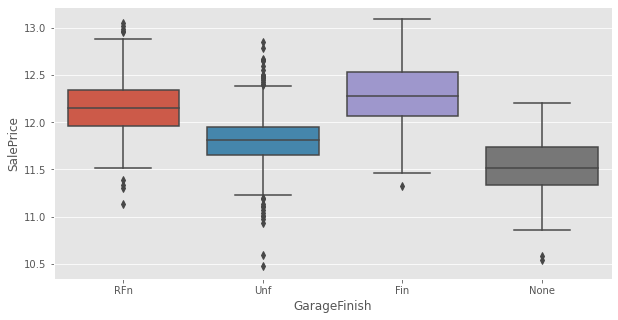

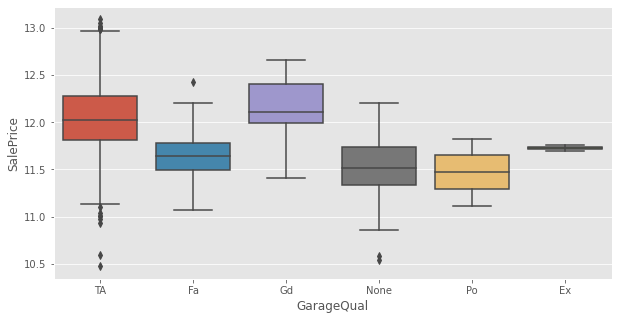

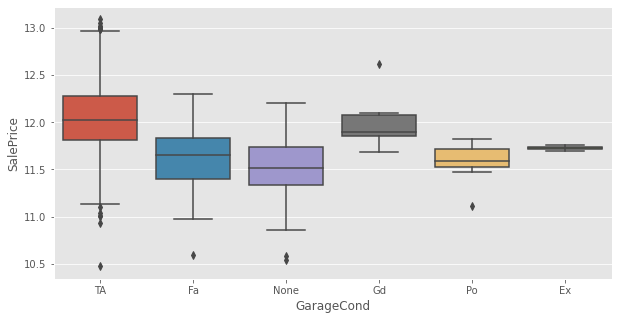

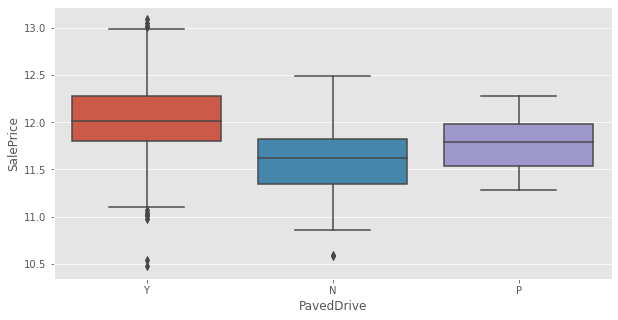

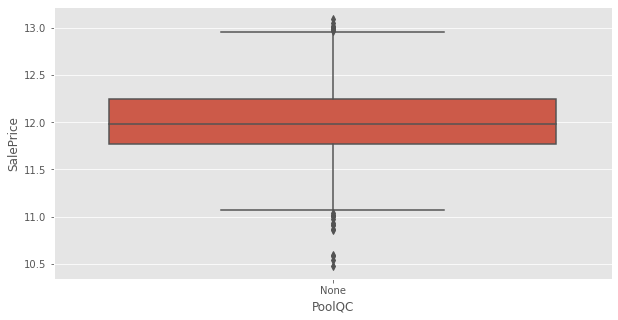

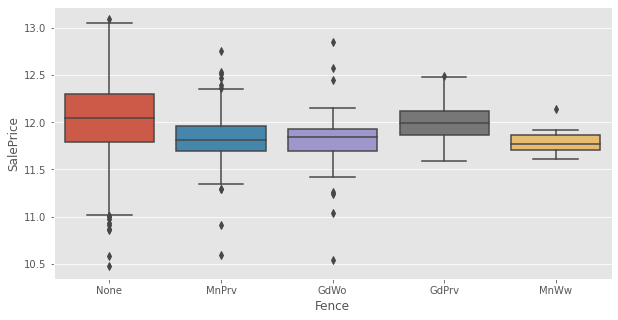

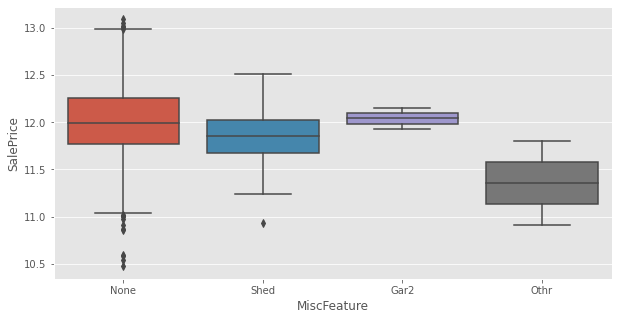

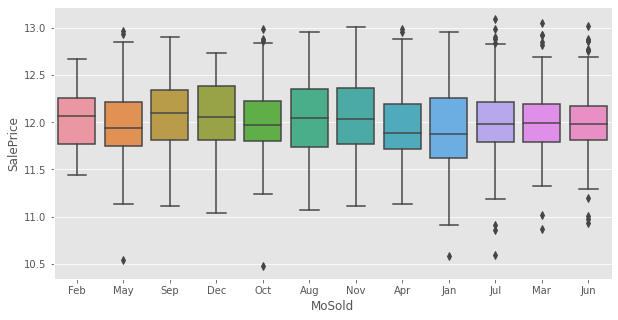

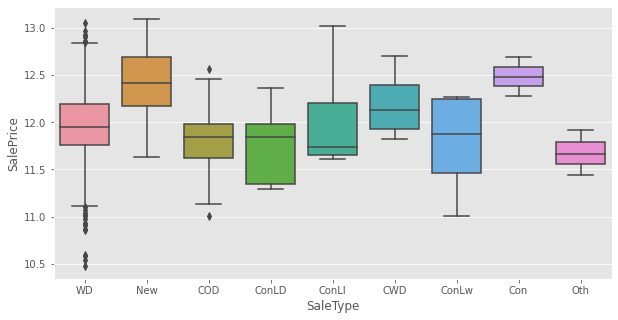

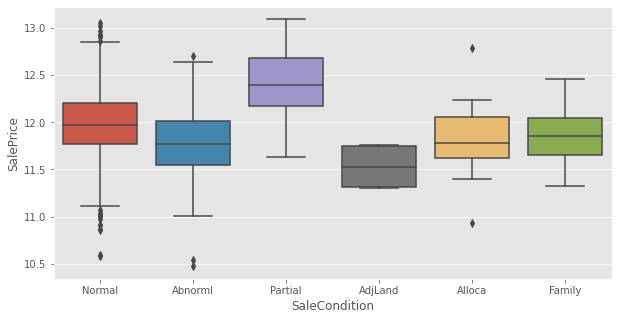

In [40]:
#visualize the comparison between Saleprice and other variables
for column in df:
    if df[column].dtype=='object':
        plt.figure(figsize = (10, 5))
        sns.boxplot(x = column, y = 'SalePrice', data = df)
        plt.show()

**Observation:**
- Houses in Commercial zoning sell for lower price in comparison to other zones
- Paved street access has typically has higher price sold.
- Neighborhood is an important variable for price as variations much observable based on the locality
- 2 Story houses sell typically sell for higher prices
- Centralized Air conditioned houses typically sell for higher prices
- Houses with Excellent Kitchen quality sell for higher prices
- Houses with Excellent Fireplace quality sell for higher prices
- Houses with Garage typically sell for higher prices irrespectively of garage quality or condition

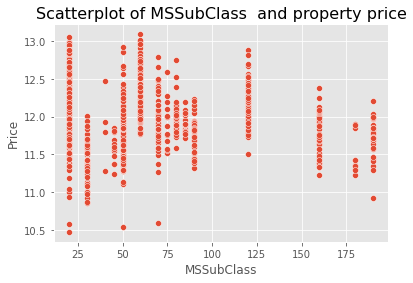

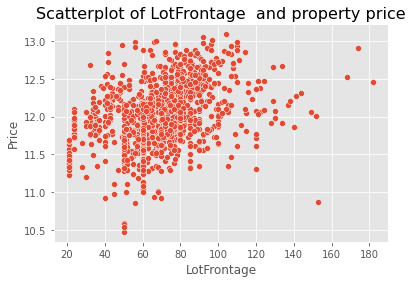

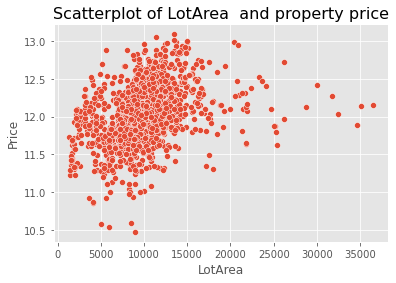

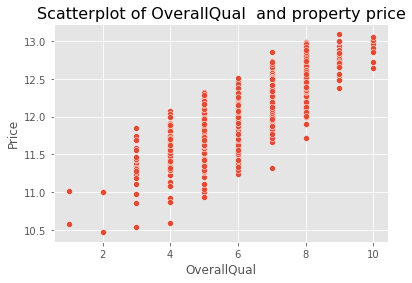

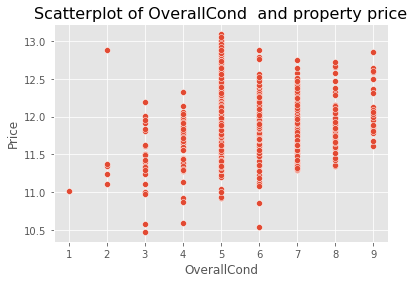

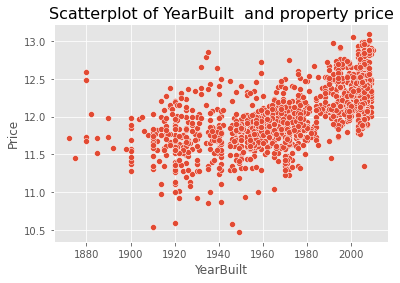

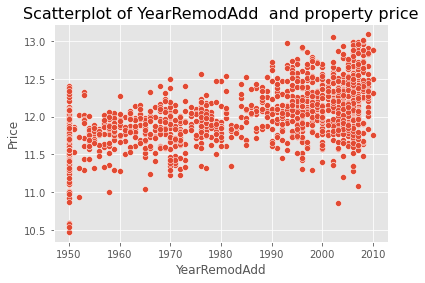

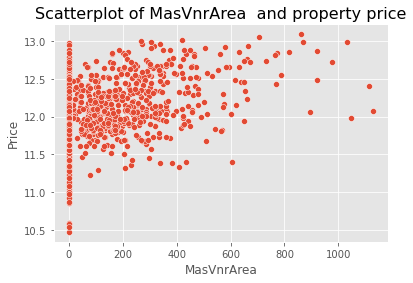

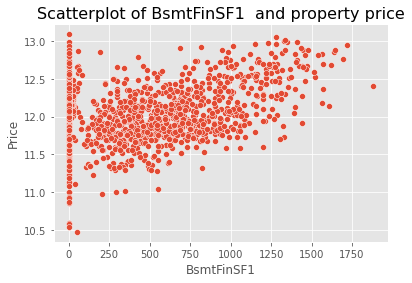

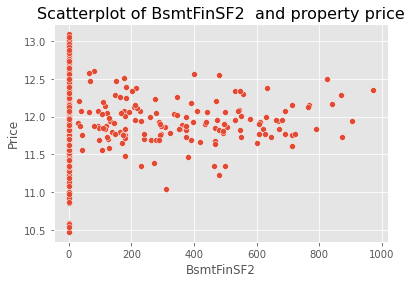

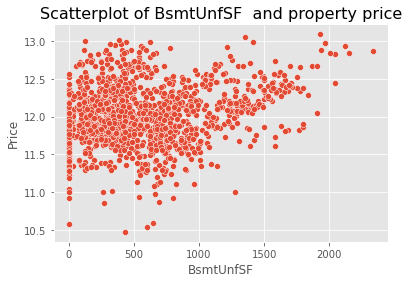

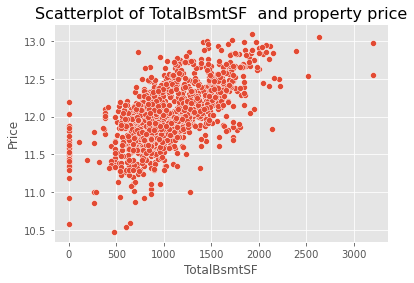

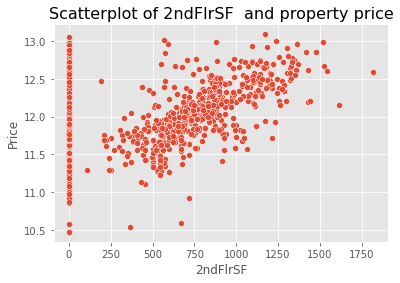

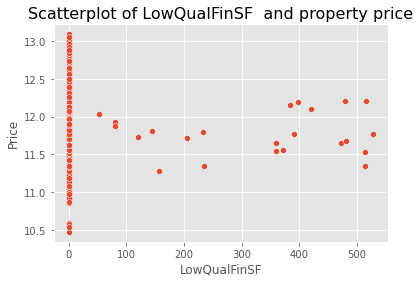

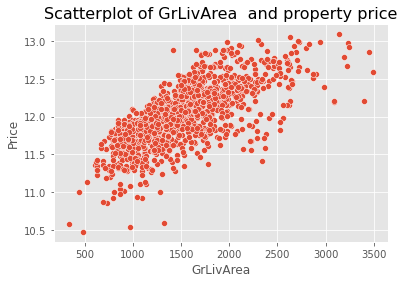

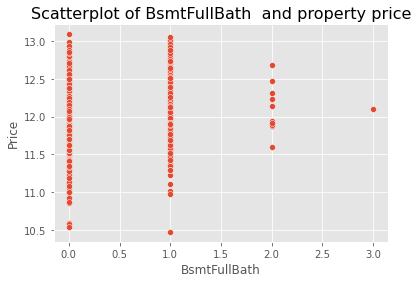

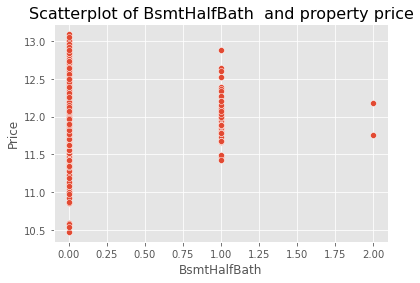

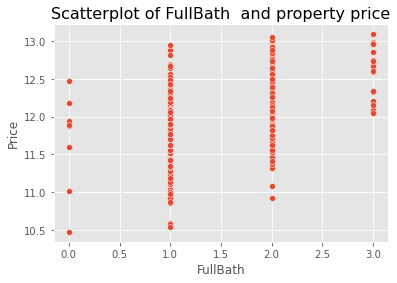

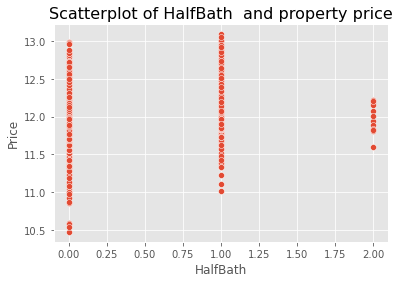

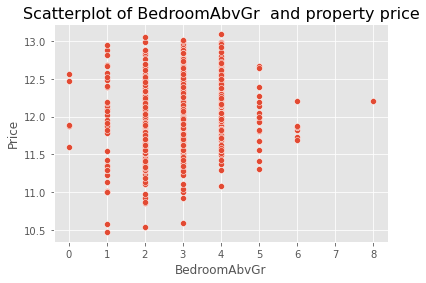

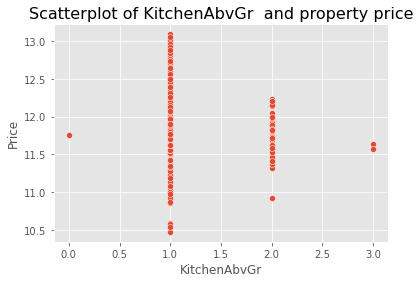

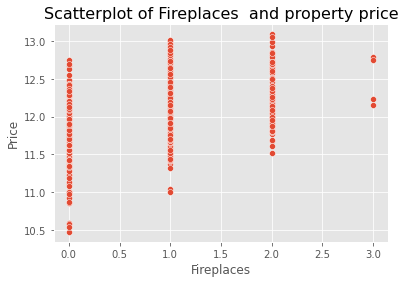

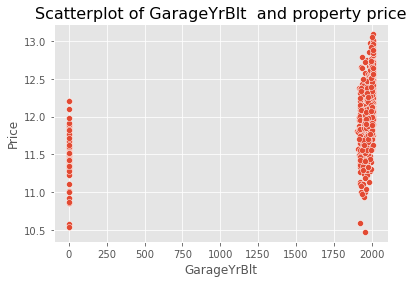

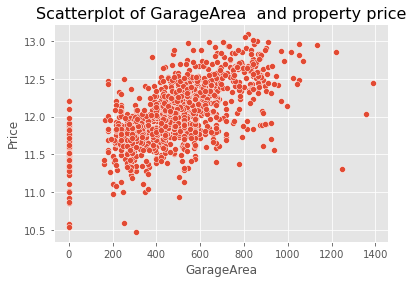

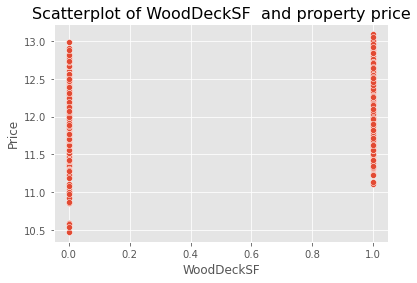

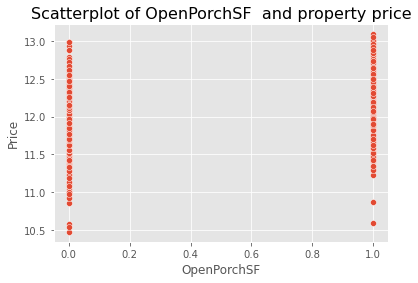

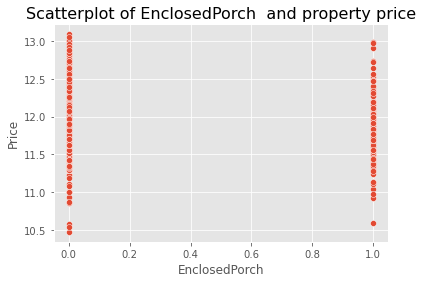

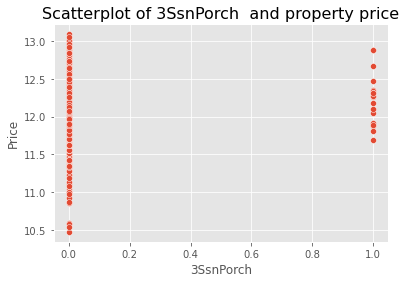

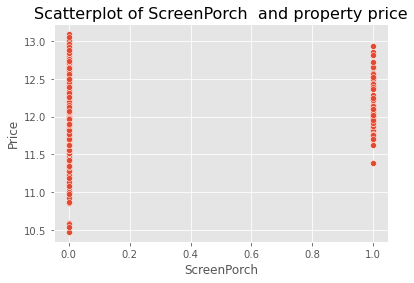

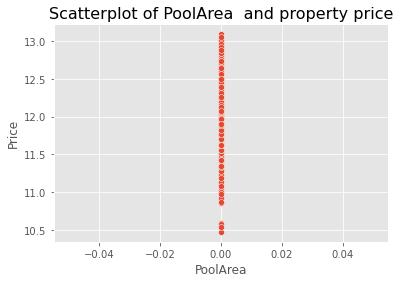

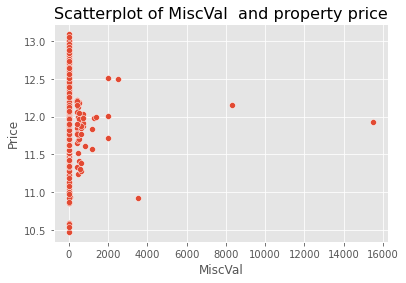

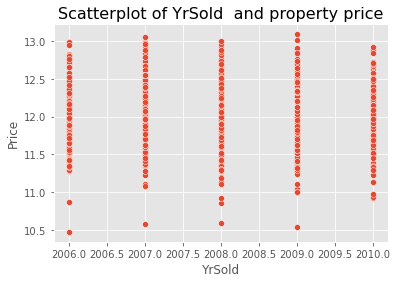

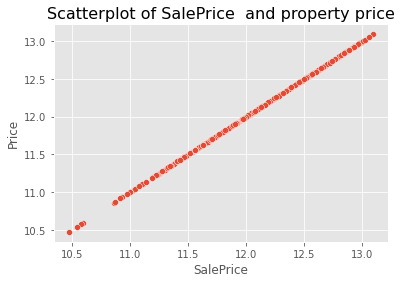

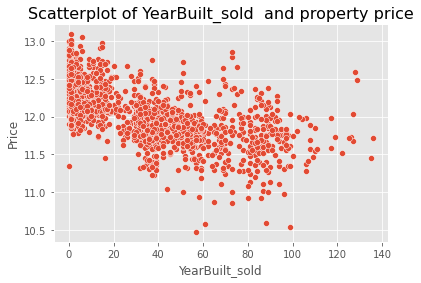

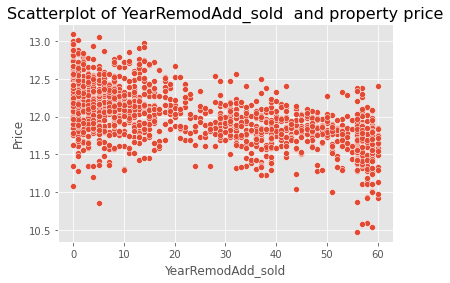

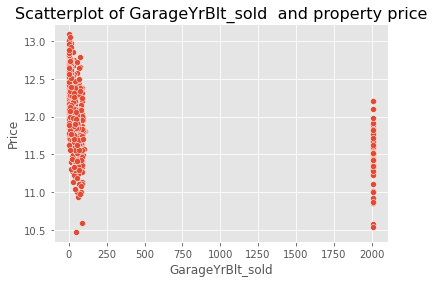

In [41]:
for column in df:
    if df[column].dtype!='object':
        sns.scatterplot(x=column,y='SalePrice' ,data=df)
        plt.title('Scatterplot of '+column+'  and property price', fontsize=16)
        plt.xlabel(column)
        plt.ylabel('Price')
        plt.show()

**Observation:**
- LotFrontage and LotArea has linear relationship with SalePrice
- Houses the has OverallQual above 7 sell for higher prices
- TotalBsmtSF, GrLivArea and GarageArea has linear relationship with SalePrice
- WoodDeckSF, OpenPorchSF, EnclosedPorch, ScreenPorch, PoolArea does not seem to have much impact in SalePrice
- No. of years after built has negative linear relationship with SalePrice which means if the home is built recently then it fetches higher price.

# Model Building

In [42]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.metrics import r2_score,mean_squared_error
from sklearn import metrics
import statsmodels.api as sm
import statsmodels
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [43]:
def encodeDataMinMax(df):
    dummy_vars=pd.concat([df.select_dtypes(include=['object']),df[['OverallQual','OverallCond', 'MSSubClass']]], axis=1)
    dummy=pd.get_dummies(dummy_vars, drop_first = True)
    df=pd.concat([dummy,df], axis=1)
    df.drop(list(dummy_vars.columns), axis=1, inplace=True)
    
    scaler = MinMaxScaler()
    # Apply scaler() to all the columns except the 'dummy' variables
    num_vars = df.loc[:, ~df.columns.isin(list(dummy_vars.columns))]
    df[list(num_vars.columns)] = scaler.fit_transform(df[list(num_vars.columns)])
    return df

In [44]:
def encodeDataDummy(df):
    dummy_vars=pd.concat([df.select_dtypes(include=['object']),df[['OverallQual','OverallCond', 'MSSubClass']]], axis=1)
    dummy=pd.get_dummies(dummy_vars, drop_first = True)
    df=pd.concat([dummy,df], axis=1)
    df.drop(list(dummy_vars.columns), axis=1, inplace=True)
    return df

In [45]:
#method to check VIF of dataset
from statsmodels.stats.outliers_influence import variance_inflation_factor
def checkVIF(X):
    vif=pd.DataFrame()
    vif['features']=X.columns
    vif['VIF']=[variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF']=round(vif['VIF'],2)
    vif=vif.sort_values(by="VIF", ascending=False)
    print(vif)

In [46]:
from sklearn.model_selection import train_test_split
np.random.seed(0)
df1=encodeDataDummy(df)
df_train, df_test = train_test_split(df1, train_size = 0.7, test_size = 0.3, random_state = 100)

### Dividing into X and Y sets for the model building

In [47]:
y_train = df_train.pop('SalePrice')
X_train = df_train
y_test=df_test.pop('SalePrice')
X_test=df_test

In [48]:
num_values=X_train.select_dtypes(include=['int64','float64']).columns
num_values

Index(['LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'Fireplaces', 'GarageYrBlt',
       'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'YrSold', 'YearBuilt_sold',
       'YearRemodAdd_sold', 'GarageYrBlt_sold'],
      dtype='object')

In [49]:
##   Scaling the data
scaler = StandardScaler()
X_train[num_values] = scaler.fit_transform(X_train[num_values])
X_test[num_values] = scaler.fit_transform(X_test[num_values])

In [50]:
## Building a Regression model.
lm = LinearRegression(n_jobs = 30)
lm.fit(X_train,y_train)


LinearRegression(n_jobs=30)

In [51]:
#calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = lm.predict(X_train)
y_pred_test = lm.predict(X_test)

metric = []
r2_train_lr = r2_score(y_train, y_pred_train)
print('R2 Score (Train) - ',r2_train_lr)
metric.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print('R2 Score (Test)  - ',r2_test_lr)
metric.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print('RSS (Train)      - ',rss1_lr)
metric.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print('RSS (Test)       - ',rss2_lr)
metric.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print('MSE (Train)      - ',mse_train_lr)
metric.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print('MSE (Test)       - ',mse_test_lr)
metric.append(mse_test_lr**0.5)

R2 Score (Train) -  0.9442842586915987
R2 Score (Test)  -  -8.597512502424997e+21
RSS (Train)      -  7.876221016695308
RSS (Test)       -  5.561423537096249e+23
MSE (Train)      -  0.0079961634687262
MSE (Test)       -  1.3147573373749997e+21


# Ridge and Lasso Regression

## Ridge Regression

In [52]:
# list of alphas to tune - if value too high it will lead to underfitting, if it is too low, 
# it will not handle the overfitting
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [53]:
print(model_cv.best_params_)

{'alpha': 8.0}


In [54]:
#Fitting Ridge model for alpha = 8 and printing coefficients which have been penalised
alpha = 8
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
print(ridge.coef_)

[ 0.03230147  0.01983437  0.0430513   0.00367057  0.04853897  0.00452416
  0.02579673  0.02242063 -0.01799915 -0.00426743  0.03352161 -0.04371073
 -0.01742729 -0.00179346  0.02693617 -0.02800554 -0.00094647 -0.01030291
  0.00061172 -0.01982039 -0.00277368 -0.02695432  0.02643355 -0.0088483
 -0.0100176   0.11936489 -0.05358322 -0.03338649 -0.04968258 -0.07004121
 -0.04650402 -0.00386563  0.02630228  0.00713726  0.00472823  0.05195435
 -0.01412329  0.02060315 -0.02349161 -0.0162078   0.05882123  0.06553261
 -0.00549225  0.01137336  0.00910344  0.034939   -0.02762521  0.02067943
 -0.01147245  0.02877674 -0.00616141  0.01741881  0.01132713  0.02487819
 -0.00887251 -0.02034066  0.          0.          0.02064382 -0.01442481
 -0.063021   -0.03774262  0.03313189 -0.03271025 -0.01031821  0.04703592
 -0.01267937 -0.00151563  0.0072217  -0.00844293  0.0175729   0.00357551
  0.01184263  0.00392115  0.01066644  0.00091188 -0.03913571  0.02635937
 -0.00176755  0.00778297 -0.03274164  0.08241354 -0.

In [55]:
betas = pd.DataFrame(index=X_train.columns)
betas.rows = X_train.columns
betas['Ridge'] = ridge.coef_
betas.sort_values(by=['Ridge'], ascending=False).head(10)

Ridge
Neighborhood_Crawfor  0.119365
GrLivArea             0.111425
Functional_Typ        0.094283
Exterior1st_BrkFace   0.082414
Neighborhood_StoneBr  0.065533
SaleCondition_Normal  0.065211
CentralAir_Y          0.059892
Neighborhood_Somerst  0.058821
SaleType_New          0.056991
BsmtCond_Gd           0.055455

R2 Score (Train) -  0.9344889970946719
R2 Score (Test)  -  0.8807994131643437
RSS (Train)      -  9.260922062432098
RSS (Test)       -  7.71065990397247
MSE (Train)      -  0.009401951332418373
MSE (Test)       -  0.018228510411282435


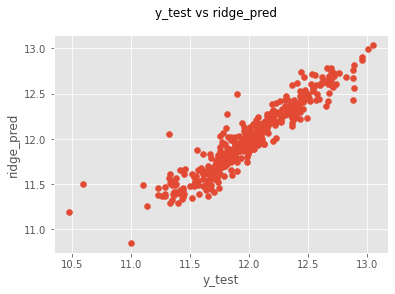

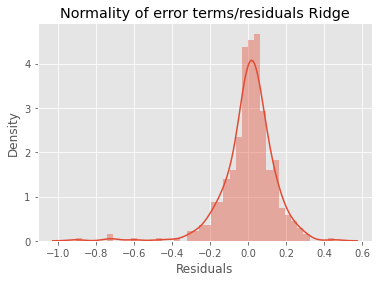

In [56]:
#calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)

metric2 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print('R2 Score (Train) - ',r2_train_lr)
metric2.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print('R2 Score (Test)  - ',r2_test_lr)
metric2.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print('RSS (Train)      - ',rss1_lr)
metric2.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print('RSS (Test)       - ',rss2_lr)
metric2.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print('MSE (Train)      - ',mse_train_lr)
metric2.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print('MSE (Test)       - ',mse_test_lr)
metric2.append(mse_test_lr**0.5)

# Plotting y_test and y_pred to understand the spread for ridge regression.
fig = plt.figure()
plt.scatter(y_test,y_pred_test)
fig.suptitle('y_test vs ridge_pred') 
plt.xlabel('y_test')
plt.ylabel('ridge_pred')  
plt.show()

y_res=y_test-y_pred_test
# Distribution of errors
sns.distplot(y_res,kde=True)
plt.title('Normality of error terms/residuals Ridge')
plt.xlabel("Residuals")
plt.show()

## Ridge Regression with RFE

In [57]:
rfe=RFE(lm,50)
rfe=rfe.fit(X_train,y_train)
list(zip(X_train.columns, rfe.support_,rfe.ranking_))

[('MSZoning_FV', True, 1),
 ('MSZoning_RH', True, 1),
 ('MSZoning_RL', True, 1),
 ('MSZoning_RM', True, 1),
 ('Street_Pave', False, 113),
 ('Alley_None', False, 132),
 ('Alley_Pave', False, 112),
 ('LotShape_IR2', False, 180),
 ('LotShape_IR3', False, 134),
 ('LotShape_Reg', False, 151),
 ('LandContour_HLS', False, 136),
 ('LandContour_Low', False, 114),
 ('LandContour_Lvl', False, 128),
 ('Utilities_NoSeWa', False, 148),
 ('LotConfig_CulDSac', False, 142),
 ('LotConfig_FR2', False, 105),
 ('LotConfig_FR3', False, 193),
 ('LotConfig_Inside', False, 108),
 ('LandSlope_Mod', False, 201),
 ('LandSlope_Sev', False, 22),
 ('Neighborhood_Blueste', False, 84),
 ('Neighborhood_BrDale', False, 89),
 ('Neighborhood_BrkSide', False, 181),
 ('Neighborhood_ClearCr', False, 173),
 ('Neighborhood_CollgCr', False, 178),
 ('Neighborhood_Crawfor', True, 1),
 ('Neighborhood_Edwards', False, 110),
 ('Neighborhood_Gilbert', False, 175),
 ('Neighborhood_IDOTRR', False, 121),
 ('Neighborhood_MeadowV', False,

In [58]:
#check rfe cols
rfe_cols = X_train.columns[rfe.support_]
rfe_cols

Index(['MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL', 'MSZoning_RM',
       'Neighborhood_Crawfor', 'Neighborhood_NridgHt', 'Neighborhood_Somerst',
       'Neighborhood_StoneBr', 'Condition2_RRAe', 'BldgType_Duplex',
       'BldgType_Twnhs', 'RoofStyle_Gable', 'RoofStyle_Gambrel',
       'RoofStyle_Hip', 'RoofStyle_Mansard', 'RoofStyle_Shed',
       'RoofMatl_Metal', 'Exterior1st_BrkComm', 'Exterior1st_CBlock',
       'Exterior1st_CemntBd', 'Exterior2nd_CBlock', 'Exterior2nd_CmentBd',
       'ExterCond_Gd', 'ExterCond_Po', 'ExterCond_TA', 'BsmtCond_Gd',
       'BsmtCond_None', 'BsmtCond_TA', 'BsmtFinType1_None', 'Heating_Grav',
       'Electrical_FuseP', 'Functional_Maj2', 'GarageType_None',
       'GarageFinish_None', 'GarageQual_Fa', 'GarageQual_None',
       'GarageQual_Po', 'GarageQual_TA', 'GarageCond_None', 'GarageCond_Po',
       'MiscFeature_Othr', 'SaleType_New', 'SaleCondition_Partial',
       'YearBuilt', 'YearRemodAdd', 'BsmtFinSF1', 'TotalBsmtSF', 'GrLivArea',
       'Garage

In [59]:
#create RFE filtered dataset
X_train_rfe=X_train[rfe_cols]
X_test_rfe=X_test[rfe_cols]

In [60]:
# list of alphas to tune - if value too high it will lead to underfitting, if it is too low, 
# it will not handle the overfitting
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge_rfe = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge_rfe, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train_rfe, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [61]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 0.7}


In [62]:
#Fitting Ridge model for alpha = 10 and printing coefficients which have been penalised
alpha = 0.7
ridge_rfe = Ridge(alpha=alpha)

ridge_rfe.fit(X_train_rfe, y_train)
print(ridge_rfe.coef_)

[ 0.16024938  0.14948652  0.23354239  0.17169496  0.21270162  0.16158494
  0.14746891  0.13022963 -0.17040676 -0.15173388 -0.13974239 -0.03460509
 -0.03194836 -0.03082375 -0.02010183  0.08287749  0.14016255 -0.29028337
 -0.05024491 -0.14759462 -0.05024491  0.15670541  0.07313387 -0.14887237
  0.06648368  0.15962569  0.05686449  0.13280672  0.05686449 -0.30635992
 -0.06352996 -0.27228995  0.00280433  0.00280433 -0.1309075   0.00280433
  0.114621   -0.07283962  0.00280433 -0.09182975 -0.14695167  0.19688037
 -0.13984734  0.08083672  0.0553526   0.04854956  0.05797556  0.1747349
  0.02719197 -0.02698262]


In [63]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = ridge_rfe.predict(X_train_rfe)
y_pred_test = ridge_rfe.predict(X_test_rfe)

metric4 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print('R2 Score (Train) - ',r2_train_lr)
metric4.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print('R2 Score (Test)  - ',r2_test_lr)
metric4.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print('RSS (Train)      - ',rss1_lr)
metric4.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print('RSS (Test)       - ',rss2_lr)
metric4.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print('MSE (Train)      - ',mse_train_lr)
metric4.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print('MSE (Test)       - ',mse_test_lr)
metric4.append(mse_test_lr**0.5)

R2 Score (Train) -  0.8921079002374017
R2 Score (Test)  -  0.8515190287593898
RSS (Train)      -  15.252099383938848
RSS (Test)       -  9.604703314307798
MSE (Train)      -  0.015484364856790708
MSE (Test)       -  0.02270615440734704


## Lasso Regression

In [64]:
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [65]:
#Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 0.001}


In [66]:
#Fitting Lasso model for alpha = 0.001 and printing coefficients which have been penalised

alpha =0.001

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 

Lasso(alpha=0.001)

In [67]:
lasso.coef_

array([ 0.        ,  0.        ,  0.04010434, -0.00493223,  0.        ,
       -0.        ,  0.        ,  0.        , -0.        , -0.00629847,
        0.02648738, -0.        , -0.        , -0.        ,  0.01753896,
       -0.        , -0.        , -0.00612862, -0.        , -0.        ,
       -0.        , -0.        ,  0.03066483, -0.        ,  0.        ,
        0.11662291, -0.03827881, -0.00212049, -0.00646459, -0.00906086,
       -0.01445017,  0.        ,  0.        ,  0.        ,  0.        ,
        0.04800491, -0.        ,  0.        , -0.        , -0.        ,
        0.08184415,  0.04372583,  0.        ,  0.        , -0.        ,
        0.01935274, -0.        ,  0.        , -0.        ,  0.        ,
       -0.        ,  0.        ,  0.        ,  0.        , -0.        ,
       -0.        ,  0.        ,  0.        ,  0.        , -0.        ,
       -0.02715976, -0.00349169,  0.        , -0.03166961, -0.        ,
        0.        , -0.        , -0.        ,  0.        , -0.00

In [68]:
betas = pd.DataFrame(index=X_train.columns)
betas.rows = X_train.columns
betas['Lasso'] = lasso.coef_
betas.sort_values(by=['Lasso'], ascending=False).head(10)

Lasso
GrLivArea             0.135688
Neighborhood_Crawfor  0.116623
Functional_Typ        0.114918
Neighborhood_Somerst  0.081844
SaleType_New          0.076526
Exterior1st_BrkFace   0.073582
CentralAir_Y          0.065173
TotalBsmtSF           0.058611
SaleCondition_Normal  0.048070
Neighborhood_NridgHt  0.048005

R2 Score (Train) -  0.9181925207986764
R2 Score (Test)  -  0.875330488118338
RSS (Train)      -  11.564663268891502
RSS (Test)       -  8.0644251176304
MSE (Train)      -  0.011740774892275636
MSE (Test)       -  0.01906483479345248


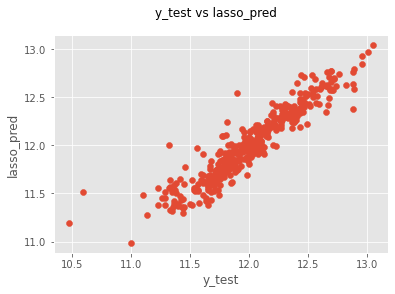

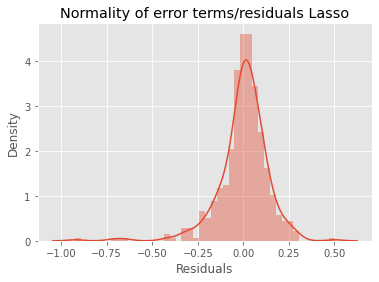

In [69]:
#calculate some metrics such as R2 score, RSS and RMSE

y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

metric3 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print('R2 Score (Train) - ',r2_train_lr)
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print('R2 Score (Test)  - ',r2_test_lr)
metric3.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print('RSS (Train)      - ',rss1_lr)
metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print('RSS (Test)       - ',rss2_lr)
metric3.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print('MSE (Train)      - ',mse_train_lr)
metric3.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print('MSE (Test)       - ',mse_test_lr)
metric3.append(mse_test_lr**0.5)

# Plotting y_test and y_pred to understand the spread for ridge regression.
fig = plt.figure()
plt.scatter(y_test,y_pred_test)
fig.suptitle('y_test vs lasso_pred')
plt.xlabel('y_test')
plt.ylabel('lasso_pred')  
plt.show()

y_res=y_test-y_pred_test
# Distribution of errors
sns.distplot(y_res,kde=True)
plt.title('Normality of error terms/residuals Lasso')
plt.xlabel("Residuals")
plt.show()

# Model Evaluation

In [70]:
#observe the changes in the coefficients after regularization
betas = pd.DataFrame(index=X_train.columns)
betas.rows = X_train.columns
betas['Linear'] = lm.coef_
betas['Ridge'] = ridge.coef_
betas['Lasso'] = lasso.coef_
pd.set_option('display.max_rows', None)
betas.head(200)

Linear     Ridge     Lasso
MSZoning_FV           4.011267e-01  0.032301  0.000000
MSZoning_RH           3.814144e-01  0.019834  0.000000
MSZoning_RL           4.095763e-01  0.043051  0.040104
MSZoning_RM           3.902959e-01  0.003671 -0.004932
Street_Pave           1.102800e-01  0.048539  0.000000
Alley_None            1.110772e-02  0.004524 -0.000000
Alley_Pave            2.840812e-02  0.025797  0.000000
LotShape_IR2          3.001274e-02  0.022421  0.000000
LotShape_IR3         -2.266297e-02 -0.017999 -0.000000
LotShape_Reg         -1.172086e-03 -0.004267 -0.006298
LandContour_HLS       1.925211e-02  0.033522  0.026487
LandContour_Low      -5.720852e-02 -0.043711 -0.000000
LandContour_Lvl      -1.929047e-02 -0.017427 -0.000000
Utilities_NoSeWa     -1.143351e-02 -0.001793 -0.000000
LotConfig_CulDSac     3.183733e-02  0.026936  0.017539
LotConfig_FR2        -4.336614e-02 -0.028006 -0.000000
LotConfig_FR3        -2.199731e-02 -0.000946 -0.000000
LotConfig_Inside     -1.180817e-02 -0.010303 -0.006129
LandSlope_Mod         7.763677e-04  0.000612 -0.000000
LandSlope_Sev        -5.087920e-02 -0.019820 -0.000000
Neighborhood_Blueste -6.392492e-02 -0.002774 -0.000000
Neighborhood_BrDale  -1.010508e-01 -0.026954 -0.000000
Neighborhood_BrkSide  9.469152e-03  0.026434  0.030665
Neighborhood_ClearCr -1.940852e-02 -0.008848 -0.000000
Neighborhood_CollgCr -1.309514e-02 -0.010018  0.000000
Neighborhood_Crawfor  1.586153e-01  0.119365  0.116623
Neighborhood_Edwards -4.973122e-02 -0.053583 -0.038279
Neighborhood_Gilbert -1.723968e-02 -0.033386 -0.002120
Neighborhood_IDOTRR  -2.055016e-02 -0.049683 -0.006465
Neighborhood_MeadowV -1.936501e-01 -0.070041 -0.009061
Neighborhood_Mitchel -8.976727e-02 -0.046504 -0.014450
Neighborhood_NAmes   -3.087997e-02 -0.003866  0.000000
Neighborhood_NPkVill  1.516795e-01  0.026302  0.000000
Neighborhood_NWAmes  -1.353866e-02  0.007137  0.000000
Neighborhood_NoRidge  3.284401e-02  0.004728  0.000000
Neighborhood_NridgHt  6.053268e-02  0.051954  0.048005
Neighborhood_OldTown -2.583820e-02 -0.014123 -0.000000
Neighborhood_SWISU    7.102188e-02  0.020603  0.000000
Neighborhood_Sawyer  -4.348344e-02 -0.023492 -0.000000
Neighborhood_SawyerW -2.284096e-02 -0.016208 -0.000000
Neighborhood_Somerst  8.016220e-02  0.058821  0.081844
Neighborhood_StoneBr  1.267696e-01  0.065533  0.043726
Neighborhood_Timber   1.496381e-02 -0.005492  0.000000
Neighborhood_Veenker  1.395668e-02  0.011373  0.000000
Condition1_Feedr     -1.023508e-02  0.009103 -0.000000
Condition1_Norm       2.995653e-02  0.034939  0.019353
Condition1_PosA      -2.343355e-01 -0.027625 -0.000000
Condition1_PosN      -5.548772e-03  0.020679  0.000000
Condition1_RRAe      -3.924880e-02 -0.011472 -0.000000
Condition1_RRAn       3.192300e-02  0.028777  0.000000
Condition1_RRNe      -2.423943e-02 -0.006161 -0.000000
Condition1_RRNn       1.867024e-02  0.017419  0.000000
Condition2_Feedr      2.001080e-01  0.011327  0.000000
Condition2_Norm       1.523837e-01  0.024878  0.000000
Condition2_PosN       3.556087e-03 -0.008873 -0.000000
Condition2_RRAe      -2.158594e-01 -0.020341 -0.000000
Condition2_RRAn       3.551424e+08  0.000000  0.000000
Condition2_RRNn       4.175435e+10  0.000000  0.000000
BldgType_2fmCon      -2.087581e-02  0.020644  0.000000
BldgType_Duplex      -6.074965e-02 -0.014425 -0.000000
BldgType_Twnhs       -7.697623e-02 -0.063021 -0.027160
BldgType_TwnhsE      -6.558660e-02 -0.037743 -0.003492
HouseStyle_1.5Unf     5.645742e-02  0.033132  0.000000
HouseStyle_1Story    -3.871974e-02 -0.032710 -0.031670
HouseStyle_2.5Fin    -6.041188e-02 -0.010318 -0.000000
HouseStyle_2.5Unf     1.040449e-01  0.047036  0.000000
HouseStyle_2Story    -1.702256e-02 -0.012679 -0.000000
HouseStyle_SFoyer    -2.024658e-02 -0.001516 -0.000000
HouseStyle_SLvl      -2.992257e-02  0.007222  0.000000
RoofStyle_Gable       3.025780e+10 -0.008443 -0.004155
RoofStyle_Gambrel     3.025780e+10  0.017573  0.000000
RoofStyle_Hip         3.025780e+10  0.003576  0.000000
RoofStyle_Man

In [71]:
# Creating a table which contain all the metrics of different models

lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)'], 
        'Linear Regression': metric
        }

lr_metric = pd.DataFrame(lr_table ,columns = ['Metric', 'Linear Regression'] )

rg_metric = pd.Series(metric2, name = 'Ridge Regression')
rg_rfe_metric=pd.Series(metric4, name = 'Ridge+RFE Regression')
ls_metric = pd.Series(metric3, name = 'Lasso Regression')

final_metric = pd.concat([lr_metric, rg_metric, rg_rfe_metric, ls_metric], axis = 1)

final_metric

Metric  Linear Regression  Ridge Regression  \
0  R2 Score (Train)       9.442843e-01          0.934489   
1   R2 Score (Test)      -8.597513e+21          0.880799   
2       RSS (Train)       7.876221e+00          9.260922   
3        RSS (Test)       5.561424e+23          7.710660   
4       MSE (Train)       8.942127e-02          0.096964   
5        MSE (Test)       3.625958e+10          0.135013   

   Ridge+RFE Regression  Lasso Regression  
0              0.892108          0.918193  
1              0.851519          0.875330  
2             15.252099         11.564663  
3              9.604703          8.064425  
4              0.124436          0.108355  
5              0.150686          0.138075

**Observation:**
- Based on the above table Lasso can be selected as final model since it has the least variation between **train score(0.92) and test score(0.88)** while having above 90% train score.

# Part 2 - Subjective questions

1) What is the optimal value of alpha for ridge and lasso regression? 

- Optimal Alpha for Ridge - 8
- Optimal Alpha for Lasso - 0.001

2) What will be the changes in the model if you choose double the value of alpha for both ridge and lasso? What will be the most important predictor variables after the change is implemented?

### Double Alpha for Ridge

R2 Score (Train) -  0.9289760084846581
R2 Score (Test)  -  0.8780842496191645
RSS (Train)      -  10.04026225849344
RSS (Test)       -  7.8862941289063215
MSE (Train)      -  0.010193159653292833
MSE (Test)       -  0.018643721344932203


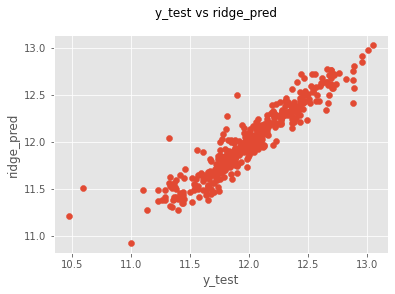

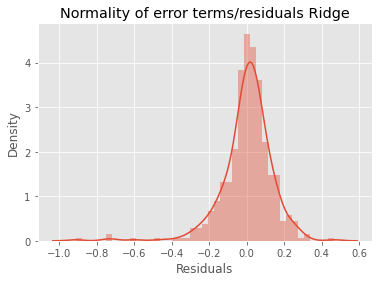

In [72]:
#Fitting Ridge model for double alpha = 16 and printing coefficients which have been penalised
alpha = 16
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
#calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)

metric2 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print('R2 Score (Train) - ',r2_train_lr)
metric2.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print('R2 Score (Test)  - ',r2_test_lr)
metric2.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print('RSS (Train)      - ',rss1_lr)
metric2.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print('RSS (Test)       - ',rss2_lr)
metric2.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print('MSE (Train)      - ',mse_train_lr)
metric2.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print('MSE (Test)       - ',mse_test_lr)
metric2.append(mse_test_lr**0.5)

# Plotting y_test and y_pred to understand the spread for ridge regression.
fig = plt.figure()
plt.scatter(y_test,y_pred_test)
fig.suptitle('y_test vs ridge_pred') 
plt.xlabel('y_test')
plt.ylabel('ridge_pred')  
plt.show()

y_res=y_test-y_pred_test
# Distribution of errors
sns.distplot(y_res,kde=True)
plt.title('Normality of error terms/residuals Ridge')
plt.xlabel("Residuals")
plt.show()

In [73]:
betas = pd.DataFrame(index=X_train.columns)
betas.rows = X_train.columns
betas['Ridge'] = ridge.coef_
betas.sort_values(by=['Ridge'], ascending=False).head(10)

Ridge
GrLivArea             0.108544
Neighborhood_Crawfor  0.094699
Functional_Typ        0.082434
Exterior1st_BrkFace   0.064683
TotalBsmtSF           0.056722
SaleCondition_Normal  0.054151
CentralAir_Y          0.053813
Neighborhood_Somerst  0.048444
Neighborhood_StoneBr  0.047348
SaleType_New          0.042481

**Ridge with Best Alpha - 8**
- Neighborhood_Crawfor	0.119365
- GrLivArea	0.111425
- Functional_Typ	0.094283
- Exterior1st_BrkFace	0.082414
- Neighborhood_StoneBr	0.065533

**Ridge with Double Alpha - 16**
- GrLivArea	0.108544
- Neighborhood_Crawfor	0.094699
- Functional_Typ	0.082434
- Exterior1st_BrkFace	0.064683
- TotalBsmtSF	0.056722

R2 Score (Train) -  0.9039750505871317
R2 Score (Test)  -  0.8651461271986037
RSS (Train)      -  13.574507077027697
RSS (Test)       -  8.723215023586544
MSE (Train)      -  0.013781225458911367
MSE (Test)       -  0.020622257738975282


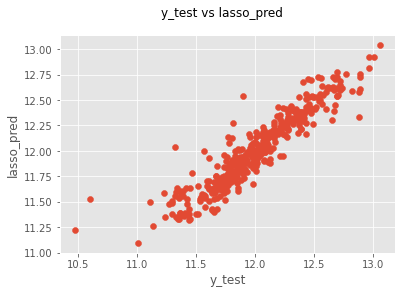

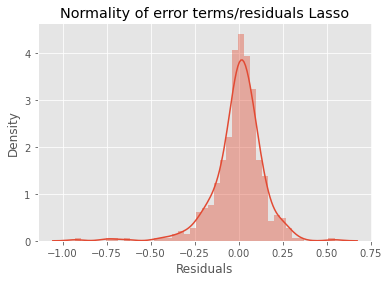

In [74]:
#Fitting Lasso model for double alpha = 0.002 and printing coefficients which have been penalised

alpha =0.002

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 
#calculate some metrics such as R2 score, RSS and RMSE

y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

metric3 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print('R2 Score (Train) - ',r2_train_lr)
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print('R2 Score (Test)  - ',r2_test_lr)
metric3.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print('RSS (Train)      - ',rss1_lr)
metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print('RSS (Test)       - ',rss2_lr)
metric3.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print('MSE (Train)      - ',mse_train_lr)
metric3.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print('MSE (Test)       - ',mse_test_lr)
metric3.append(mse_test_lr**0.5)

# Plotting y_test and y_pred to understand the spread for ridge regression.
fig = plt.figure()
plt.scatter(y_test,y_pred_test)
fig.suptitle('y_test vs lasso_pred')
plt.xlabel('y_test')
plt.ylabel('lasso_pred')  
plt.show()

y_res=y_test-y_pred_test
# Distribution of errors
sns.distplot(y_res,kde=True)
plt.title('Normality of error terms/residuals Lasso')
plt.xlabel("Residuals")
plt.show()

In [75]:
betas = pd.DataFrame(index=X_train.columns)
betas.rows = X_train.columns
betas['Lasso'] = lasso.coef_
betas.sort_values(by=['Lasso'], ascending=False).head(10)

Lasso
GrLivArea             0.140115
Functional_Typ        0.104581
Neighborhood_Crawfor  0.081813
TotalBsmtSF           0.062239
SaleType_New          0.052753
CentralAir_Y          0.052680
Neighborhood_Somerst  0.049737
YearRemodAdd          0.043071
Exterior1st_BrkFace   0.042048
BsmtFinSF1            0.037658

**Lasso with Best Alpha - 0.001**
- GrLivArea	0.135688
- Neighborhood_Crawfor	0.116623
- Functional_Typ	0.114918
- Neighborhood_Somerst	0.081844
- SaleType_New	0.076526

**Lasso Double Alpha - 0.002**
- GrLivArea	0.140115
- Functional_Typ	0.104581
- Neighborhood_Crawfor	0.081813
- TotalBsmtSF	0.062239
- SaleType_New	0.052753



3) After building the model, you realised that the five most important predictor variables in the lasso model are not available in the incoming data. You will now have to create another model excluding the five most important predictor variables. Which are the five most important predictor variables now?

### Top 5 predictors for Lasso
- GrLivArea
- Functional
- Neighborhood
- SaleType 
- TotalBsmtSF

In [76]:
np.random.seed(0)
df2=df.drop(['GrLivArea','Functional','Neighborhood','SaleType','TotalBsmtSF'],axis=1)
df2=encodeDataDummy(df2)
df_train, df_test = train_test_split(df2, train_size = 0.7, test_size = 0.3, random_state = 100)

y_train = df_train.pop('SalePrice')
X_train = df_train
y_test=df_test.pop('SalePrice')
X_test=df_test

num_values=X_train.select_dtypes(include=['int64','float64']).columns
num_values

##   Scaling the data
scaler = StandardScaler()
X_train[num_values] = scaler.fit_transform(X_train[num_values])
X_test[num_values] = scaler.fit_transform(X_test[num_values])

## Building a Regression model.
lm = LinearRegression(n_jobs = 30)
lm.fit(X_train,y_train)

lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 
#Printing the best hyperparameter alpha
print(model_cv.best_params_)

Fitting 5 folds for each of 28 candidates, totalling 140 fits
{'alpha': 0.001}


R2 Score (Train) -  0.8985369240482207
R2 Score (Test)  -  0.8437923367035285
RSS (Train)      -  14.343264443103706
RSS (Test)       -  10.104515405901044
MSE (Train)      -  0.014561689789953002
MSE (Test)       -  0.023887743276361804


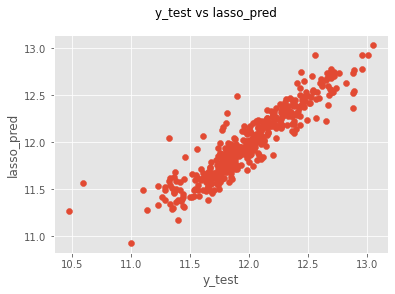

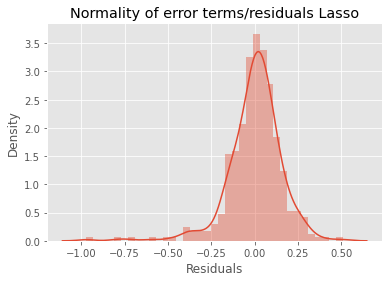

Lasso
BsmtFinSF1             0.155892
BsmtUnfSF              0.130769
Exterior1st_BrkFace    0.100354
2ndFlrSF               0.099956
CentralAir_Y           0.064463
SaleCondition_Partial  0.048320
BsmtFinSF2             0.040878
GarageArea             0.038797
PavedDrive_Y           0.036236
Fireplaces             0.034354

In [77]:
#Fitting Lasso model for double alpha = 0.002 and printing coefficients which have been penalised

alpha =0.001

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 
#calculate some metrics such as R2 score, RSS and RMSE

y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

metric3 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print('R2 Score (Train) - ',r2_train_lr)
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print('R2 Score (Test)  - ',r2_test_lr)
metric3.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print('RSS (Train)      - ',rss1_lr)
metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print('RSS (Test)       - ',rss2_lr)
metric3.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print('MSE (Train)      - ',mse_train_lr)
metric3.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print('MSE (Test)       - ',mse_test_lr)
metric3.append(mse_test_lr**0.5)

# Plotting y_test and y_pred to understand the spread for ridge regression.
fig = plt.figure()
plt.scatter(y_test,y_pred_test)
fig.suptitle('y_test vs lasso_pred')
plt.xlabel('y_test')
plt.ylabel('lasso_pred')  
plt.show()

y_res=y_test-y_pred_test
# Distribution of errors
sns.distplot(y_res,kde=True)
plt.title('Normality of error terms/residuals Lasso')
plt.xlabel("Residuals")
plt.show()

betas = pd.DataFrame(index=X_train.columns)
betas.rows = X_train.columns
betas['Lasso'] = lasso.coef_
betas.sort_values(by=['Lasso'], ascending=False).head(10)

### After removing top 5 predictors below are the new top predictors

- BsmtFinSF1	0.155892 - Original Variable(**BsmtFinSF1**)
- BsmtUnfSF	0.130769 - Original Variable(**BsmtUnfSF**)
- Exterior1st_BrkFace	0.100354 - Original Variable(**Exterior1st**)
- 2ndFlrSF	0.099956 - Original Variable(**2ndFlrSF**)
- CentralAir_Y	0.064463 - Original Variable(**CentralAir**)